In [58]:
# Import the necessary libraries/packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
import mltools as ml
from sklearn.ensemble import RandomForestClassifier
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier
import xgboost as xgb
from xgboost import plot_importance
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import Pipeline

In [59]:
# Instantiate the necessary constants
FILENAME = "diabetes_012_health_indicators_BRFSS2015.csv"

# Helper Functions

In [60]:
def read_file(filename, header=True):
    """Read in a .csv file as a Pandas dataframe
    
    Parameters: filename - the name of a .csv file (a string),
                header - confirms whether a .csv file 
                         contains a header (a boolean)
    
    Returns: df - a dataframe
    """
    if header:
        df = pd.read_csv(filename)
    else:
        df = pd.read_csv(filename, header=None)
    
    return df

In [61]:
def identify_data_dims(df):
    """Investigate the dimensions of a dataframe
    
    Parameters: df - a dataframe
    
    Returns: the number of rows and columns in the dataframe
    """
    data_dims = df.shape
    
    return data_dims

In [62]:
def get_var_types(df):
    """Observe the data types of each column of a dataframe
    
    Parameters: df - a dataframe
    
    Returns: the columns of the dataframe and their data types
    """
    data_info = df.info()
    
    return data_info

In [63]:
def gauge_missing_vals(df):
    """Counts the missing values both by column and by row
    
    Parameters: df - a dataframe
    
    Returns: the missing values of the df both by column and by row
    """
    col_missing_vals = df.isnull().sum()
    row_missing_vals = df.isnull().sum(axis=1).sort_values(ascending=False)
    
    return col_missing_vals, row_missing_vals

In [64]:
def scrutinize_data(df, col_lst):
    """Observe each column's values and their frequencies
    
    Parameters: df - a dataframe
                col_lst - a list of columns from the dataframe
    
    Returns: nothing
    """
    for col in col_lst:
        print(df[col].value_counts(dropna=False))

In [65]:
def change_col_data_types(df, col_lst, data_type):
    """Change the data types of a column's values
    
    Parameters: df - a dataframe
                col_lst - a list of columns from the dataframe
                data_type - a data type to set the column(s) to
    
    Returns: nothing
    """
    for col in col_lst:
        df[col] = df[col].astype(data_type)

In [66]:
def drop_duplicates(df):
    """Drop duplicate rows from a dataframe
    
    Parameters: df - a dataframe
    
    Returns: the shape of the dataframe after dropping duplicates
    """
    df.drop_duplicates(inplace=True)
    
    return df.shape

In [67]:
def create_model(
            units=64, learning_rate=0.001, 
            optimizer="adam", activation="relu"):
    """Create a Keras' Neural Networks Classifier model instance
    
    Parameters: units - the number of neurons in a particular layer
                learning_rate - the size of the steps taken 
                                during the optimization process
                optimizer - an algorithm that adjusts the model's weights 
                            during training to minimize the loss function
                activation - a function that allows the neural network 
                             to learn complex patterns
    
    Returns: the model instance
    """
    model = Sequential()
    
    model.add(Dense(
               units=units, activation=activation, 
               input_dim=X_train.shape[1]))
    model.add(Dense(units=3, activation="softmax"))
    
    model.compile(
             loss="sparse_categorical_crossentropy", optimizer=optimizer, 
             metrics=["accuracy"])
    
    return model

# Read/load in the data as a Pandas dataframe

In [68]:
# Read in file
diabdata_df = read_file(FILENAME)
print(diabdata_df.head(5))

   Diabetes_012  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0           0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1           0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2           0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3           0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4           0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
0                   0.0           0.0     0.0  ...            1.0   
1                   0.0           1.0     0.0  ...            0.0   
2                   0.0           0.0     1.0  ...            1.0   
3                   0.0           1.0     1.0  ...            1.0   
4                   0.0           1.0     1.0  ...            1.0   

   NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  \
0          0.0      5.0      18.0      15.0       1.0  0.0   9.0        4.0   
1     

# Data Cleaning/Preprocessing

# Identify the dimensions of the dataframe and indicate if the variables have suitable types

In [69]:
# Print information for diabdata_df
diabdata_dims = identify_data_dims(diabdata_df)
print("There are {} rows and {} columns.".format(
                                            diabdata_dims[0], diabdata_dims[1]))

There are 253680 rows and 22 columns.


In [70]:
# Gauge the data types of diabdata_df's columns
diabdata_info = get_var_types(diabdata_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

All the variables consist of floats, however they should consist of integers.

# Identify if there are any missing values

In [71]:
# Check for missing values in df rows and columns
diabdata_col_missing_vals, \
diabdata_row_missing_vals = gauge_missing_vals(diabdata_df)

print(diabdata_col_missing_vals)
print(" ")
print(diabdata_row_missing_vals)

Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64
 
0         0
169110    0
169112    0
169113    0
169114    0
         ..
84564     0
84565     0
84566     0
84567     0
253679    0
Length: 253680, dtype: int64


There are no missing values at all in the dataset, thus neither imputation nor deletion are necessary.

# Identify if there is any invalid data

In [72]:
# Check for value counts in each column of df
scrutinize_data(diabdata_df, diabdata_df.columns)

0.0    213703
2.0     35346
1.0      4631
Name: Diabetes_012, dtype: int64
0.0    144851
1.0    108829
Name: HighBP, dtype: int64
0.0    146089
1.0    107591
Name: HighChol, dtype: int64
1.0    244210
0.0      9470
Name: CholCheck, dtype: int64
27.0    24606
26.0    20562
24.0    19550
25.0    17146
28.0    16545
        ...  
85.0        1
91.0        1
86.0        1
90.0        1
78.0        1
Name: BMI, Length: 84, dtype: int64
0.0    141257
1.0    112423
Name: Smoker, dtype: int64
0.0    243388
1.0     10292
Name: Stroke, dtype: int64
0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64
1.0    191920
0.0     61760
Name: PhysActivity, dtype: int64
1.0    160898
0.0     92782
Name: Fruits, dtype: int64
1.0    205841
0.0     47839
Name: Veggies, dtype: int64
0.0    239424
1.0     14256
Name: HvyAlcoholConsump, dtype: int64
1.0    241263
0.0     12417
Name: AnyHealthcare, dtype: int64
0.0    232326
1.0     21354
Name: NoDocbcCost, dtype: int64
2.0    89084
3.0    75646


After comparing the unique instances for each feature to the expected unique instances outlined by the original dataset description, there does not appear to be any invalid data, thus no invalid data needs to be handled.

# Filter any columns with only missing values

There are no missing values at all in the dataset, thus this step is unnecessary.

# Impute/delete the missing values as applicable

There are no missing values at all in the dataset, thus this step is unnecessary.

# Change column data types as necessary

In [73]:
# Change variable data types to integer-based
change_col_data_types(diabdata_df, diabdata_df.columns, int)
print(diabdata_df.dtypes)

Diabetes_012            int64
HighBP                  int64
HighChol                int64
CholCheck               int64
BMI                     int64
Smoker                  int64
Stroke                  int64
HeartDiseaseorAttack    int64
PhysActivity            int64
Fruits                  int64
Veggies                 int64
HvyAlcoholConsump       int64
AnyHealthcare           int64
NoDocbcCost             int64
GenHlth                 int64
MentHlth                int64
PhysHlth                int64
DiffWalk                int64
Sex                     int64
Age                     int64
Education               int64
Income                  int64
dtype: object


# Handle invalid data as necessary

As proven above, no invalid data needs to be handled.

# Transform features into desired outputs as necessary

Since all features (both categorical and numerical) already consist of integers, no transformation is necessary.

# Perform summary statistics of each feature, remove outliers as necessary

In [74]:
# Print the summary statistics of each column
diabdata_df.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.296921,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.094186,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.698160,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.292087,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


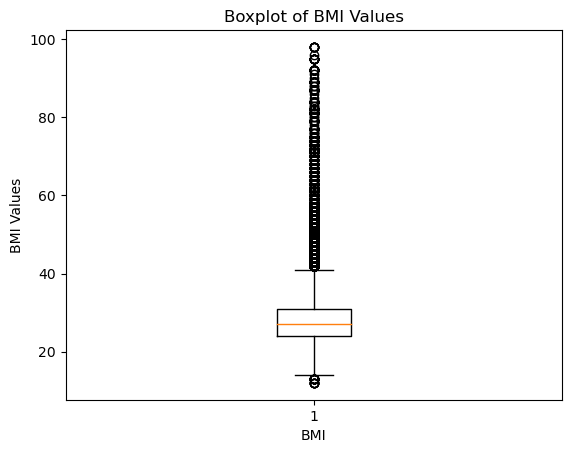

In [75]:
# Plot a boxplot with the unique values for "BMI"
plt.boxplot(diabdata_df["BMI"])

plt.xlabel("BMI")
plt.ylabel("BMI Values")
plt.title("Boxplot of BMI Values")

plt.show()

The feature "BMI" is the only feature that takes on unexpected values at times, so certain outliers will be removed via the Interquartile Range (IQR) Method.

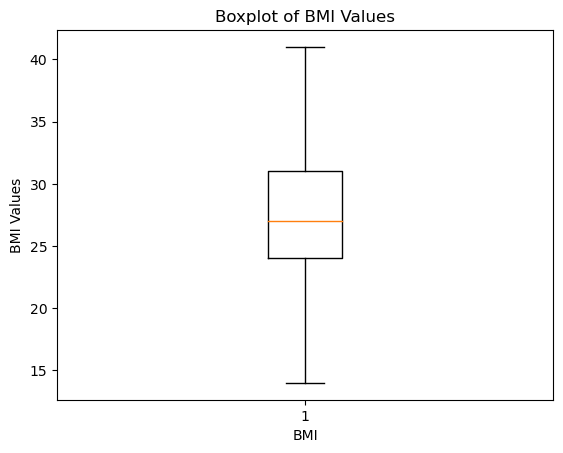

In [76]:
# Remove outliers from "BMI" and replot the boxplot
q1 = diabdata_df["BMI"].quantile(0.25)
q3 = diabdata_df["BMI"].quantile(0.75)
iqr = q3 - q1

diabdata_df_no_outliers = diabdata_df[(diabdata_df["BMI"] >= q1 - 1.5 * iqr) \
                                      & (diabdata_df["BMI"] <= q3 + 1.5 * iqr)]

plt.boxplot(diabdata_df_no_outliers["BMI"])

plt.xlabel("BMI")
plt.ylabel("BMI Values")
plt.title("Boxplot of BMI Values")

plt.show()

In [77]:
# Reprint the summary statistics without outliers
diabdata_df_no_outliers.describe()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,243833.000000,243833.000000,243833.000000,243833.000000,243833.000000,243833.000000,243833.000000,243833.000000,243833.000000,243833.000000,...,243833.000000,243833.000000,243833.000000,243833.000000,243833.000000,243833.000000,243833.000000,243833.000000,243833.000000,243833.000000
mean,0.280102,0.420140,0.422027,0.962187,27.569492,0.443398,0.040122,0.093039,0.764585,0.637896,...,0.951774,0.081580,2.480964,3.070413,4.063667,0.156931,0.445001,8.062932,5.060558,6.090767
std,0.681138,0.493582,0.493884,0.190744,4.964920,0.496787,0.196245,0.290488,0.424259,0.480610,...,0.214243,0.273725,1.059246,7.272803,8.541691,0.363737,0.496967,3.064311,0.983537,2.054222
min,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,2.000000,1.000000,1.000000,1.000000,41.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


# Drop duplicate rows as necessary

In [78]:
# Check for shape of df
diabdata_initial_dims = diabdata_df_no_outliers.shape
print("Before dropping duplicates:", diabdata_initial_dims)

# Drop duplicates
diabdata_final_dims = drop_duplicates(diabdata_df_no_outliers)

# Check shape for df are duplicates are dropped
print("After dropping duplicates:", diabdata_final_dims)

print(" ")

print("There were", diabdata_initial_dims[0] - diabdata_final_dims[0],
      "rows removed from the data after dropping duplicates.")

Before dropping duplicates: (243833, 22)
After dropping duplicates: (219937, 22)
 
There were 23896 rows removed from the data after dropping duplicates.


/var/folders/1x/r9x6mvp96yv9_p0x37hh3yqr0000gn/T/ipykernel_8879/978934415.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop_duplicates(inplace=True)


# Shuffle the data

In [79]:
# Shuffle the data
diabdata_df_no_outliers = diabdata_df_no_outliers.sample(frac=1)
print(diabdata_df_no_outliers.head(5))

        Diabetes_012  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
81556              2       0         1          1   25       1       0   
95470              0       1         1          1   24       1       0   
22515              0       0         0          1   26       0       0   
214221             2       0         1          1   35       0       0   
86881              0       0         0          1   28       0       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  AnyHealthcare  \
81556                      1             0       0  ...              1   
95470                      0             1       1  ...              1   
22515                      0             0       1  ...              1   
214221                     0             0       0  ...              1   
86881                      0             0       1  ...              1   

        NoDocbcCost  GenHlth  MentHlth  PhysHlth  DiffWalk  Sex  Age  \
81556             0        5         0

# Exploratory Data Analysis

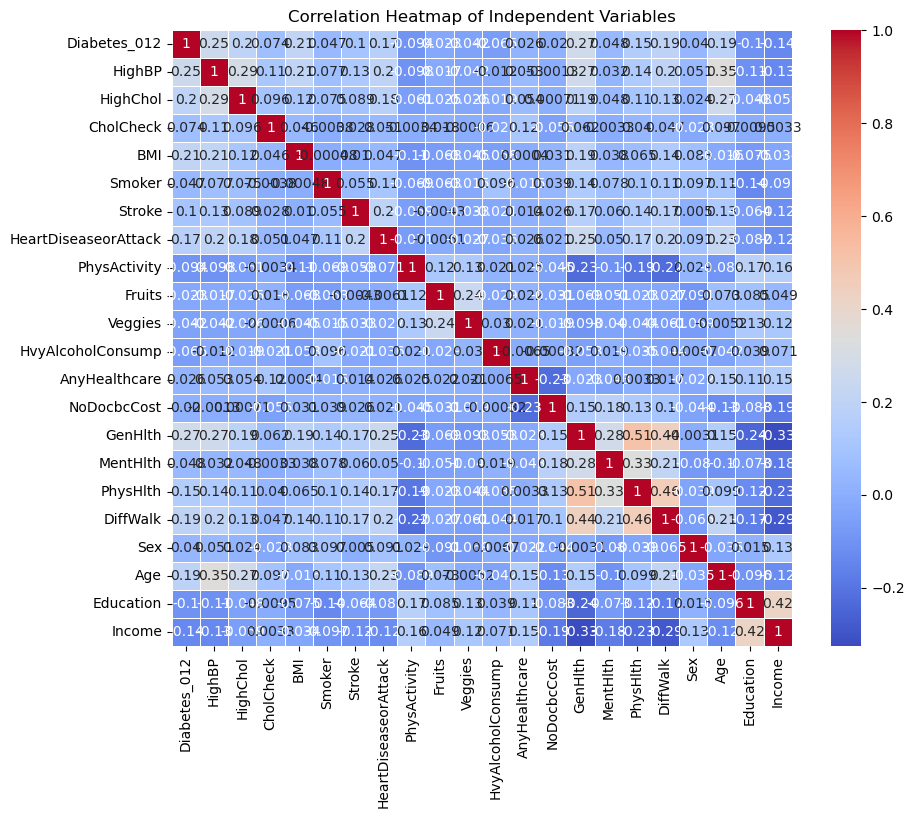

In [80]:
# Plot a correlation heatmap to determine 
# correlations between independent variables
corr_matrix = diabdata_df_no_outliers.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Independent Variables")
plt.show()

Since the highest correlation coefficient between two independent variables is 0.51 (considerably weak positive correlation), no independent variables are confounded, thus no variables need to be filtered out of the dataframe. In other words, all features will be kept for further ML/DL model development.

# Drop confounded features as necessary

As proven above, none of the independent variables are confounded, thus no features need to be dropped.

# Standardize the non-binary features

In [81]:
# Standardize all features with unique values other than 0 and 1
scaler = StandardScaler()

diabdata_df_no_outliers["BMI_standardized"] \
= scaler.fit_transform(diabdata_df_no_outliers[["BMI"]])
diabdata_df_no_outliers["GenHlth_standardized"] \
= scaler.fit_transform(diabdata_df_no_outliers[["GenHlth"]])
diabdata_df_no_outliers["MentHlth_standardized"] \
= scaler.fit_transform(diabdata_df_no_outliers[["MentHlth"]])
diabdata_df_no_outliers["PhysHlth_standardized"] \
= scaler.fit_transform(diabdata_df_no_outliers[["PhysHlth"]])
diabdata_df_no_outliers["Age_standardized"] \
= scaler.fit_transform(diabdata_df_no_outliers[["Age"]])
diabdata_df_no_outliers["Education_standardized"] \
= scaler.fit_transform(diabdata_df_no_outliers[["Education"]])
diabdata_df_no_outliers["Income_standardized"] \
= scaler.fit_transform(diabdata_df_no_outliers[["Income"]])

print(diabdata_df_no_outliers)

        Diabetes_012  HighBP  HighChol  CholCheck  BMI  Smoker  Stroke  \
81556              2       0         1          1   25       1       0   
95470              0       1         1          1   24       1       0   
22515              0       0         0          1   26       0       0   
214221             2       0         1          1   35       0       0   
86881              0       0         0          1   28       0       0   
...              ...     ...       ...        ...  ...     ...     ...   
36141              0       1         0          1   33       0       0   
253086             0       0         0          1   29       1       0   
3319               0       0         0          1   26       1       0   
66793              2       1         1          1   31       1       0   
66821              0       1         1          1   28       0       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  ...  Age  Education  \
81556                      1        

# Drop the non-standardized features from the dataframe

In [82]:
# Drop all non-standardized features
diabdata_df = diabdata_df_no_outliers.drop(
    ["BMI", 
     "GenHlth", 
     "MentHlth", 
     "PhysHlth", 
     "Age", 
     "Education", 
     "Income"], 
    axis=1)
print(diabdata_df)

        Diabetes_012  HighBP  HighChol  CholCheck  Smoker  Stroke  \
81556              2       0         1          1       1       0   
95470              0       1         1          1       1       0   
22515              0       0         0          1       0       0   
214221             2       0         1          1       0       0   
86881              0       0         0          1       0       0   
...              ...     ...       ...        ...     ...     ...   
36141              0       1         0          1       0       0   
253086             0       0         0          1       1       0   
3319               0       0         0          1       1       0   
66793              2       1         1          1       1       0   
66821              0       1         1          1       0       0   

        HeartDiseaseorAttack  PhysActivity  Fruits  Veggies  ...  NoDocbcCost  \
81556                      1             0       0        1  ...            0   
95470    

# Divide the input data into train, cross-validation, and test datasets

In [18]:
# Create X and y values
X = diabdata_df.iloc[:, 1:]
y = diabdata_df.iloc[:, 0]

# Split X and y values into train and cross-validation
X_train, X_cv_test, y_train, y_cv_test = train_test_split(
                                       X, y, 
                                       test_size=0.3, random_state=42)

# Split cross-validation into cross-validation and test
X_cv, X_test, y_cv, y_test = train_test_split(
                           X_cv_test, y_cv_test, 
                           test_size=0.5, random_state=42)

# Implement SciKit-Learn's Decision Tree Algorithm (all features)

In [19]:
# Create a Decision Tree Classifier
dt_clf = DecisionTreeClassifier()

# Fit the classifier to the training data
dt_clf = dt_clf.fit(X=X_train, y=y_train)

# Make predictions on the cross-validation set 
y_cv_pred = dt_clf.predict(X_cv)

# Print the metric scores based on the predictions
print("Below are the metric scores for the cross-validation dataset:")
print(ml.metrics(y_cv, y_cv_pred))

print(" ")

# Make predictions on the test set 
y_test_pred = dt_clf.predict(X_test)

print("Below are the metric scores for the test dataset:")
print(ml.metrics(y_test, y_test_pred))

Below are the metric scores for the cross-validation dataset:
{'accuracy': 0.7471128489588069, 'sensitivity': 0.7471128489588069, 'specificity': 0, 'precision': 0.7614049428690817, 'f1-score': 0.7540285372807852}
 
Below are the metric scores for the test dataset:
{'accuracy': 0.7442635870388894, 'sensitivity': 0.7442635870388894, 'specificity': 0, 'precision': 0.7598135247235633, 'f1-score': 0.7518045629032043}


# Implement SciKit-Learn's Random Forest Algorithm (all features)

In [20]:
# Create a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_clf.fit(X_train, y_train)

# Make predictions on the cross-validation set
y_cv_pred = rf_clf.predict(X_cv)

# Print the metric scores based on the predictions
print("Below are the metric scores for the cross-validation dataset:")
print(ml.metrics(y_cv, y_cv_pred))

print(" ")

# Make predictions on the test set
y_test_pred = rf_clf.predict(X_test)

print("Below are the metric scores for the test dataset:")
print(ml.metrics(y_test, y_test_pred))

Below are the metric scores for the cross-validation dataset:
{'accuracy': 0.8303779818738444, 'sensitivity': 0.8303779818738444, 'specificity': 0, 'precision': 0.7779837099637237, 'f1-score': 0.7918877964168151}
 
Below are the metric scores for the test dataset:
{'accuracy': 0.8283168136764573, 'sensitivity': 0.8283168136764573, 'specificity': 0, 'precision': 0.7733436574662635, 'f1-score': 0.7891639918336054}


Since the accuracy, sensitivity, precision, and f1-score for the test dataset of SciKit-Learn's Random Forest Algorithm are higher than the accuracy, sensitivity, precision, and f1-score for the test dataset of SciKit-Learn's Decision Tree Algorithm, we will proceed with the former.

# Implement Neural Networks for Classification (all features)

In [21]:
# Define the model
model = Sequential()
model.add(Dense(units=64, activation="relu", input_dim=X_train.shape[1]))
model.add(Dense(units=3, activation="softmax"))

# Compile the model
model.compile(
         loss="sparse_categorical_crossentropy", optimizer="adam", 
         metrics=["accuracy"])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Make predictions on the cross-validation set 
y_cv_pred_prob = model.predict(X_cv)
y_cv_pred = np.argmax(y_cv_pred_prob, axis=1)

print(" ")

# Print the metric scores based on the predictions
print("Below are the metric scores for the cross-validation dataset:")
print(ml.metrics(y_cv, y_cv_pred))

print(" ")

# Make predictions on the test set
y_test_pred_prob = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)

print(" ")

print("Below are the metric scores for the test dataset:")
print(ml.metrics(y_test, y_test_pred))

Epoch 1/10
3849/3849 [==============================] - 7s 2ms/step - loss: 0.4281 - accuracy: 0.8379 - val_loss: 0.4162 - val_accuracy: 0.8407
Epoch 2/10
3849/3849 [==============================] - 6s 2ms/step - loss: 0.4192 - accuracy: 0.8407 - val_loss: 0.4154 - val_accuracy: 0.8397
Epoch 3/10
3849/3849 [==============================] - 6s 2ms/step - loss: 0.4176 - accuracy: 0.8412 - val_loss: 0.4152 - val_accuracy: 0.8418
Epoch 4/10
3849/3849 [==============================] - 6s 2ms/step - loss: 0.4166 - accuracy: 0.8413 - val_loss: 0.4147 - val_accuracy: 0.8405
Epoch 5/10
3849/3849 [==============================] - 6s 2ms/step - loss: 0.4160 - accuracy: 0.8416 - val_loss: 0.4135 - val_accuracy: 0.8417
Epoch 6/10
3849/3849 [==============================] - 6s 2ms/step - loss: 0.4152 - accuracy: 0.8421 - val_loss: 0.4139 - val_accuracy: 0.8416
Epoch 7/10
3849/3849 [==============================] - 6s 2ms/step - loss: 0.4149 - accuracy: 0.8412 - val_loss: 0.4130 - val_accuracy:

/Users/lukeabbatessa/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1031/1031 [==============================] - 1s 1ms/step
 
Below are the metric scores for the test dataset:
{'accuracy': 0.8398047952471887, 'sensitivity': 0.8398047952471887, 'specificity': 0, 'precision': 0.7888135076484273, 'f1-score': 0.7866034144670544}


/Users/lukeabbatessa/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Implement XGBoost Classification (all features)

In [22]:
# Implement an XGBoost classifier
xg_clf = xgb.XGBClassifier(objective="binary:logistic", eval_metric="logloss")

# Train the model using the training dataset
xg_clf.fit(X_train, y_train)

# Predict the target variable for the cross-validation dataset
y_cv_pred = xg_clf.predict(X_cv)

# Calculate the accuracy percentage on top of 
# the cross-validation dataset
print("Below are the metric scores for the cross-validation dataset:")
print(ml.metrics(y_cv, y_cv_pred))

print(" ")

# Predict the target variable for the test dataset
y_test_pred = xg_clf.predict(X_test)

# Calculate the accuracy percentage on top of the test dataset
print("Below are the metric scores for the test dataset:")
print(ml.metrics(y_test, y_test_pred))

Below are the metric scores for the cross-validation dataset:
{'accuracy': 0.8398654178412295, 'sensitivity': 0.8398654178412295, 'specificity': 0, 'precision': 0.7900788814802349, 'f1-score': 0.796782234404846}
 
Below are the metric scores for the test dataset:
{'accuracy': 0.8388348337425359, 'sensitivity': 0.8388348337425359, 'specificity': 0, 'precision': 0.7879832440765342, 'f1-score': 0.7961112450746823}


/Users/lukeabbatessa/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Implement Tree-Based Feature Selection with a feature importance chart

Here is the shape of the training df comprising all features: (32991, 21)
 
Here are the importances of all the features: [0.03908023 0.02701327 0.00419174 0.03536159 0.01347538 0.0196222
 0.02791022 0.03591907 0.02934789 0.0088591  0.01081961 0.0179048
 0.02225905 0.02942376 0.1591308  0.07139633 0.06768325 0.0814636
 0.12332506 0.07734178 0.09847126]
 
Here is the shape of the training df comprising the tree-based selected features: (32991, 7)
 
Features selected by SelectFromModel: ['BMI_standardized' 'GenHlth_standardized' 'MentHlth_standardized'
 'PhysHlth_standardized' 'Age_standardized' 'Education_standardized'
 'Income_standardized']
 


/Users/lukeabbatessa/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


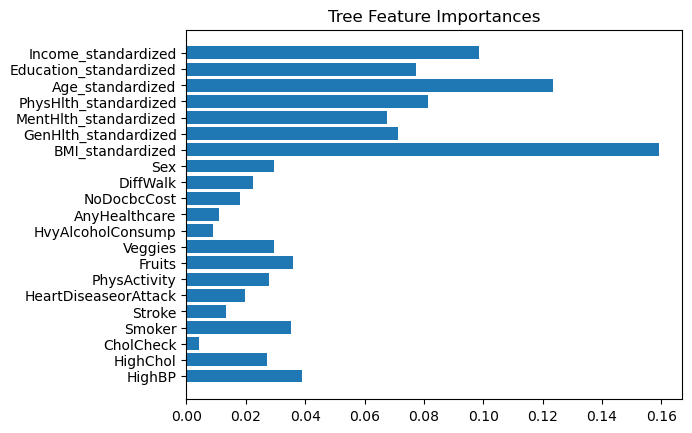

In [23]:
print("Here is the shape of the training df "
      "comprising all features:", X_cv.shape)
print(" ")

# Create model object instance
et_clf = ExtraTreesClassifier(n_estimators=50)

# Train model
et_clf = et_clf.fit(X_cv, y_cv)

print("Here are the importances of "
      "all the features:", et_clf.feature_importances_)
print(" ")

# Create an array of feature names from X_cv.columns
feature_names = np.array(X_cv.columns)

# Select features from model
model = SelectFromModel(et_clf, prefit=True)

# Transform the model
X_cv_new = model.transform(X_cv)

print("Here is the shape of the training df "
      "comprising the tree-based selected features:", X_cv_new.shape)
print(" ")

print(f"Features selected by "
      "SelectFromModel: {feature_names[model.get_support()]}")
print(" ")

# Create horizontal barplot
plt.barh(feature_names, et_clf.feature_importances_)
plt.title("Tree Feature Importances")
plt.show()

# Implement feature selection as part of a pipeline/tree's feature importance from Mean Decrease in Impurity (MDI) with a feature importance chart

GenHlth_standardized      0.088669
Education_standardized    0.089899
MentHlth_standardized     0.116028
Income_standardized       0.127485
PhysHlth_standardized     0.134366
Age_standardized          0.173077
BMI_standardized          0.270476
dtype: float64


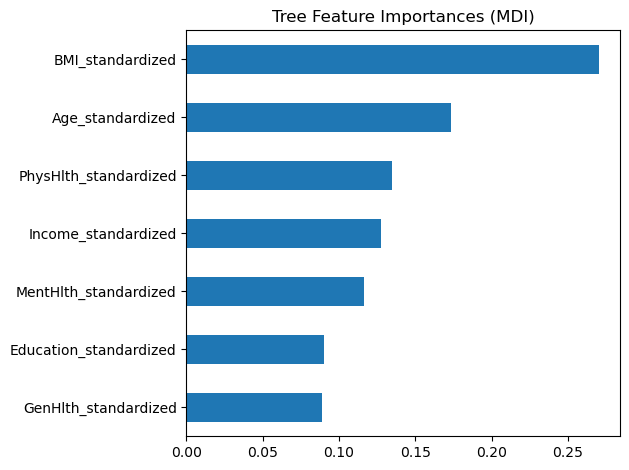

In [24]:
# Create model object instance
et_clf = ExtraTreesClassifier()

# Train the model
et_clf.fit(X_cv, y_cv)

# Create a pipeline for feature selection
et_pipe = Pipeline([("feature_selection", SelectFromModel(
                                                     et_clf, prefit=True)),
                    ("classification", ExtraTreesClassifier())])

# Train the model
et_pipe.fit(X_cv, y_cv)

# Get the indices of columns that are selected
feature_idx = et_pipe.named_steps["feature_selection"].get_support()

# Get the feature names of the selected columns
feature_names = X_cv.columns[feature_idx].tolist()

# Create mean decreasing impurity matrix
mdi_importances = pd.Series(
                et_pipe.named_steps["classification"].feature_importances_, 
                index=feature_names).sort_values(ascending=True)

print(mdi_importances)

# Create horizontal barplot
mdi_barplot = mdi_importances.plot.barh()
mdi_barplot.set_title("Tree Feature Importances (MDI)")
mdi_barplot.figure.tight_layout()
plt.show()

# Partition the dataframe based on the selected features and redivide the dataframe into train, cross-validation, and test datasets

In [25]:
# Generate a list of the features selected through feature selection
selected_features = ["BMI_standardized", 
                     "GenHlth_standardized", 
                     "MentHlth_standardized", 
                     "PhysHlth_standardized", 
                     "Age_standardized", 
                     "Education_standardized", 
                     "Income_standardized", 
                     "Diabetes_012"]

# Filter diabdata_df based on the selected features 
diabdata_df_selected_features \
= diabdata_df.loc[:, diabdata_df.columns.isin(selected_features)]

In [26]:
# Split diabdata_df_selected_features into its features and class column
X_selected_features \
= diabdata_df_selected_features[diabdata_df_selected_features.columns[1:]]
y_selected_features \
= diabdata_df_selected_features[diabdata_df_selected_features.columns[0]]

# Print X_selected_features and y_selected_features 
# to confirm the outputs
print(X_selected_features)
print(y_selected_features)

        BMI_standardized  GenHlth_standardized  MentHlth_standardized  \
56386          -1.344693             -1.486702              -0.447431   
69371           0.039907             -0.540624              -0.447431   
98022          -0.751293             -1.486702               0.343806   
199162         -0.751293             -0.540624              -0.447431   
3503           -1.542493             -1.486702              -0.051812   
...                  ...                   ...                    ...   
109969          0.039907             -1.486702              -0.447431   
48472          -0.157893              1.351534              -0.447431   
195056          0.831107              0.405455              -0.447431   
235902          0.435507              0.405455              -0.447431   
116209         -0.949093             -1.486702              -0.447431   

        PhysHlth_standardized  Age_standardized  Education_standardized  \
56386               -0.506258         -0.683583 

In [27]:
# Split X_selected_features and y_selected_features into 
# train and cross-validation
X_train_sel_feat, X_cv_test_sel_feat, y_train_sel_feat, y_cv_test_sel_feat = train_test_split(
    X_selected_features, 
    y_selected_features, 
    test_size=0.3, 
    random_state=42
)

# Split X_cv_sel_feat and y_cv_sel_feat into 
# cross-validation and test 
X_cv_sel_feat, X_test_sel_feat, y_cv_sel_feat, y_test_sel_feat = train_test_split(
    X_cv_test_sel_feat, 
    y_cv_test_sel_feat, 
    test_size=0.5, 
    random_state=42
)

# Implement SciKit-Learn's Random Forest Algorithm (selected features)

In [28]:
# Create a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_clf.fit(X_train_sel_feat, y_train_sel_feat)

# Make predictions on the cross-validation set
y_cv_pred_sel_feat = rf_clf.predict(X_cv_sel_feat)

# Print the metric scores based on the predictions
print("Below are the metric scores for the cross-validation dataset:")
print(ml.metrics(y_cv_sel_feat, y_cv_pred_sel_feat))

print(" ")

# Make predictions on the test set
y_test_pred_sel_feat = rf_clf.predict(X_test_sel_feat)

print("Below are the metric scores for the test dataset:")
print(ml.metrics(y_test_sel_feat, y_test_pred_sel_feat))

Below are the metric scores for the cross-validation dataset:
{'accuracy': 0.8176169258282562, 'sensitivity': 0.8176169258282562, 'specificity': 0, 'precision': 0.7660488039997536, 'f1-score': 0.7842145297457773}
 
Below are the metric scores for the test dataset:
{'accuracy': 0.8169803885908278, 'sensitivity': 0.8169803885908278, 'specificity': 0, 'precision': 0.7663573390499506, 'f1-score': 0.7842671351281505}


# Implement Neural Networks for Classification (selected features)

In [29]:
# Define the model
model = Sequential()
model.add(Dense(
           units=64, activation="relu", 
           input_dim=X_train_sel_feat.shape[1]))
model.add(Dense(units=3, activation="softmax"))

# Compile the model
model.compile(
         loss="sparse_categorical_crossentropy", optimizer="adam", 
         metrics=["accuracy"])

# Train the model
model.fit(
     X_train_sel_feat, y_train_sel_feat, 
     epochs=10, batch_size=32, 
     validation_split=0.2)

# Make predictions on the cross-validation set
y_cv_pred_prob_sel_feat = model.predict(X_cv_sel_feat)
y_cv_pred_sel_feat = np.argmax(y_cv_pred_prob_sel_feat, axis=1)

print(" ")

# Print the metric scores based on the predictions
print("Below are the metric scores for the cross-validation dataset:")
print(ml.metrics(y_cv_sel_feat, y_cv_pred_sel_feat))

print(" ")

# Make predictions on the test set
y_test_pred_prob_sel_feat = model.predict(X_test_sel_feat)
y_test_pred_sel_feat = np.argmax(y_test_pred_prob_sel_feat, axis=1)

print(" ")

print("Below are the metric scores for the test dataset:")
print(ml.metrics(y_test_sel_feat, y_test_pred_sel_feat))

Epoch 1/10
3849/3849 [==============================] - 7s 2ms/step - loss: 0.4436 - accuracy: 0.8360 - val_loss: 0.4301 - val_accuracy: 0.8386
Epoch 2/10
3849/3849 [==============================] - 7s 2ms/step - loss: 0.4333 - accuracy: 0.8376 - val_loss: 0.4299 - val_accuracy: 0.8390
Epoch 3/10
3849/3849 [==============================] - 6s 2ms/step - loss: 0.4325 - accuracy: 0.8384 - val_loss: 0.4323 - val_accuracy: 0.8386
Epoch 4/10
3849/3849 [==============================] - 6s 2ms/step - loss: 0.4322 - accuracy: 0.8383 - val_loss: 0.4295 - val_accuracy: 0.8390
Epoch 5/10
3849/3849 [==============================] - 6s 2ms/step - loss: 0.4322 - accuracy: 0.8387 - val_loss: 0.4300 - val_accuracy: 0.8390
Epoch 6/10
3849/3849 [==============================] - 6s 2ms/step - loss: 0.4317 - accuracy: 0.8385 - val_loss: 0.4299 - val_accuracy: 0.8391
Epoch 7/10
3849/3849 [==============================] - 6s 2ms/step - loss: 0.4317 - accuracy: 0.8385 - val_loss: 0.4288 - val_accuracy:

/Users/lukeabbatessa/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1031/1031 [==============================] - 1s 1ms/step
 
Below are the metric scores for the test dataset:
{'accuracy': 0.8373192688915159, 'sensitivity': 0.8373192688915159, 'specificity': 0, 'precision': 0.7791738658487963, 'f1-score': 0.7787016893781806}


/Users/lukeabbatessa/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Implement XGBoost Classification (selected features)

In [30]:
# Implement an XGBoost classifier
xg_clf = xgb.XGBClassifier(
       objective="binary:logistic", eval_metric="logloss")

# Train the model using the training dataset
xg_clf.fit(X_train_sel_feat, y_train_sel_feat)

# Predict the target variable for the cross-validation dataset
y_cv_pred_sel_feat = xg_clf.predict(X_cv_sel_feat)

# Calculate the accuracy percentage on top 
# of the cross-validation dataset
print("Below are the metric scores for the cross-validation dataset:")
print(ml.metrics(y_cv_sel_feat, y_cv_pred_sel_feat))

print(" ")

# Predict the target variable for the test dataset
y_test_pred_sel_feat = xg_clf.predict(X_test_sel_feat)

# Calculate the accuracy percentage on top of the test dataset
print("Below are the metric scores for the test dataset:")
print(ml.metrics(y_test_sel_feat, y_test_pred_sel_feat))

Below are the metric scores for the cross-validation dataset:
{'accuracy': 0.8362583734958019, 'sensitivity': 0.8362583734958019, 'specificity': 0, 'precision': 0.778773850817392, 'f1-score': 0.7842641304508433}
 
Below are the metric scores for the test dataset:
{'accuracy': 0.8361068170106999, 'sensitivity': 0.8361068170106999, 'specificity': 0, 'precision': 0.7763656813742675, 'f1-score': 0.7826595597838534}


/Users/lukeabbatessa/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Use GridSearchCV to perform hyperparameter tuning for SciKit-Learn's Random Forest Algorithm

In [40]:
# Create a model object instance
rf_clf = RandomForestClassifier()

# Establish a grid for parameters of RandomForestClassifier()
params = {
    "n_estimators": [50, 100],
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5]
}

# Establish a grid for GridSearchCV using 5-fold cross validation
rf_clf_grid = GridSearchCV(estimator=rf_clf, param_grid=params, cv=5)

# Fit the GridSearchCV grid to the features 
# and target of the training set
rf_clf_grid.fit(X_train, y_train)

# Print the best parameters of RandomForestClassifier()
print(rf_clf_grid.best_params_)

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}


# Implement SciKit-Learn's Random Forest Algorithm (all features and optimal hyperparameters)

In [41]:
# Create a Random Forest Classifier
rf_clf = RandomForestClassifier(
       n_estimators=50, criterion="gini", 
       max_depth=10, min_samples_split=5, 
       random_state=42)

# Fit the classifier to the training data
rf_clf.fit(X_train, y_train)

# Make predictions on the cross-validation set
y_cv_pred = rf_clf.predict(X_cv)

# Print the metric scores based on the predictions
print("Below are the metric scores for the cross-validation dataset:")
print(ml.metrics(y_cv, y_cv_pred))

print(" ")

# Make predictions on the test set
y_test_pred = rf_clf.predict(X_test)

print("Below are the metric scores for the test dataset:")
print(ml.metrics(y_test, y_test_pred))

Below are the metric scores for the cross-validation dataset:
{'accuracy': 0.8392288806038011, 'sensitivity': 0.8392288806038011, 'specificity': 0, 'precision': 0.7890974348806725, 'f1-score': 0.7810929542800827}
 


/Users/lukeabbatessa/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Below are the metric scores for the test dataset:
{'accuracy': 0.8390773241186991, 'sensitivity': 0.8390773241186991, 'specificity': 0, 'precision': 0.7873681656864491, 'f1-score': 0.7807881132263675}


/Users/lukeabbatessa/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Use GridSearchCV to perform hyperparameter tuning for Neural Networks for Classification

In [46]:
# Create a KerasClassifier
model = KerasClassifier(build_fn=create_model)

# Establish a grid for parameters of the model
params = {
    "units": [32, 64, 128],
    "learning_rate": [0.001, 0.01],
    "batch_size": [32, 64],
    "epochs": [5, 10],
    "optimizer": ["adam", "sgd"],
    "activation": ["relu", "tanh", "sigmoid"]
}

# Establish a grid for GridSearchCV using 5-fold cross validation
model_grid = GridSearchCV(estimator=model, param_grid=params, cv=5)

# Fit the GridSearchCV grid to the features 
# and target of the training set
model_grid.fit(X_train, y_train)

# Print the best parameters of the model
print(model_grid.best_params_)

/var/folders/1x/r9x6mvp96yv9_p0x37hh3yqr0000gn/T/ipykernel_8879/3602978325.py:10: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model)


Epoch 1/5
3849/3849 [==============================] - 7s 1ms/step - loss: 0.4293 - accuracy: 0.8392
Epoch 2/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4193 - accuracy: 0.8411
Epoch 3/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4173 - accuracy: 0.8408
Epoch 4/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4167 - accuracy: 0.8415
Epoch 5/5
963/963 [==============================] - 1s 1ms/step - loss: 0.4180 - accuracy: 0.8401
Epoch 1/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4339 - accuracy: 0.8367
Epoch 2/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4199 - accuracy: 0.8401
Epoch 3/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4177 - accuracy: 0.8408
Epoch 4/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4169 - accuracy: 0.8409
Epoch 5/5
963/963 [==============================] - 1s 1ms/step - loss: 0.4158 - accuracy: 0

963/963 [==============================] - 1s 1ms/step - loss: 0.4192 - accuracy: 0.8398
Epoch 1/5
3849/3849 [==============================] - 6s 1ms/step - loss: 0.4257 - accuracy: 0.8395
Epoch 2/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4190 - accuracy: 0.8409
Epoch 3/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4172 - accuracy: 0.8417
Epoch 4/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4164 - accuracy: 0.8413
Epoch 5/5
963/963 [==============================] - 1s 1ms/step - loss: 0.4133 - accuracy: 0.8412
Epoch 1/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4390 - accuracy: 0.8358
Epoch 2/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4243 - accuracy: 0.8402
Epoch 3/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4215 - accuracy: 0.8405
Epoch 4/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4200 - accuracy: 0.8411
Epoc

3849/3849 [==============================] - 5s 1ms/step - loss: 0.4192 - accuracy: 0.8405
Epoch 4/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4179 - accuracy: 0.8409
Epoch 5/5
963/963 [==============================] - 1s 1ms/step - loss: 0.4194 - accuracy: 0.8424
Epoch 1/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4370 - accuracy: 0.8379
Epoch 2/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4212 - accuracy: 0.8407
Epoch 3/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4191 - accuracy: 0.8414
Epoch 4/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4179 - accuracy: 0.8414
Epoch 5/5
963/963 [==============================] - 1s 1ms/step - loss: 0.4197 - accuracy: 0.8403
Epoch 1/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4387 - accuracy: 0.8367
Epoch 2/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4230 - accuracy: 0.8399
Epoc

3849/3849 [==============================] - 5s 1ms/step - loss: 0.4263 - accuracy: 0.8385
Epoch 2/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4184 - accuracy: 0.8406
Epoch 3/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4167 - accuracy: 0.8410
Epoch 4/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4154 - accuracy: 0.8415
Epoch 5/5
963/963 [==============================] - 1s 1ms/step - loss: 0.4184 - accuracy: 0.8414
Epoch 1/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4251 - accuracy: 0.8393
Epoch 2/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4180 - accuracy: 0.8407
Epoch 3/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4163 - accuracy: 0.8415
Epoch 4/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4149 - accuracy: 0.8415
Epoch 5/5
963/963 [==============================] - 1s 1ms/step - loss: 0.4192 - accuracy: 0.8421
Epoc

963/963 [==============================] - 1s 1ms/step - loss: 0.4169 - accuracy: 0.8405
Epoch 1/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4369 - accuracy: 0.8376
Epoch 2/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4220 - accuracy: 0.8405
Epoch 3/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4198 - accuracy: 0.8415
Epoch 4/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4185 - accuracy: 0.8411
Epoch 5/5
963/963 [==============================] - 1s 1ms/step - loss: 0.4184 - accuracy: 0.8401
Epoch 1/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4377 - accuracy: 0.8369
Epoch 2/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4224 - accuracy: 0.8402
Epoch 3/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4203 - accuracy: 0.8406
Epoch 4/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4189 - accuracy: 0.8409
Epoc

3849/3849 [==============================] - 5s 1ms/step - loss: 0.4163 - accuracy: 0.8415
Epoch 7/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4158 - accuracy: 0.8416
Epoch 8/10
3849/3849 [==============================] - 6s 1ms/step - loss: 0.4156 - accuracy: 0.8414
Epoch 9/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4153 - accuracy: 0.8418
Epoch 10/10
963/963 [==============================] - 1s 1ms/step - loss: 0.4139 - accuracy: 0.8398
Epoch 1/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4281 - accuracy: 0.8395
Epoch 2/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4184 - accuracy: 0.8412
Epoch 3/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4168 - accuracy: 0.8415
Epoch 4/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4157 - accuracy: 0.8416
Epoch 5/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4152 - accuracy:

963/963 [==============================] - 1s 1ms/step - loss: 0.4199 - accuracy: 0.8417
Epoch 1/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4254 - accuracy: 0.8387
Epoch 2/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4176 - accuracy: 0.8409
Epoch 3/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4161 - accuracy: 0.8415
Epoch 4/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4151 - accuracy: 0.8417
Epoch 5/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4141 - accuracy: 0.8415
Epoch 6/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4135 - accuracy: 0.8418
Epoch 7/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4131 - accuracy: 0.8418
Epoch 8/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4124 - accuracy: 0.8420
Epoch 9/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4120 - accuracy: 

3849/3849 [==============================] - 5s 1ms/step - loss: 0.4216 - accuracy: 0.8406
Epoch 4/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4204 - accuracy: 0.8406
Epoch 5/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4196 - accuracy: 0.8411
Epoch 6/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4190 - accuracy: 0.8412
Epoch 7/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4184 - accuracy: 0.8413
Epoch 8/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4181 - accuracy: 0.8414
Epoch 9/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4177 - accuracy: 0.8414
Epoch 10/10
963/963 [==============================] - 1s 1ms/step - loss: 0.4146 - accuracy: 0.8413
Epoch 1/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4392 - accuracy: 0.8378
Epoch 2/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4220 - accuracy:

3849/3849 [==============================] - 5s 1ms/step - loss: 0.4169 - accuracy: 0.8411
Epoch 8/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4165 - accuracy: 0.8413
Epoch 9/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4161 - accuracy: 0.8412
Epoch 10/10
963/963 [==============================] - 1s 1ms/step - loss: 0.4157 - accuracy: 0.8426
Epoch 1/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4380 - accuracy: 0.8370
Epoch 2/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4212 - accuracy: 0.8398
Epoch 3/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4189 - accuracy: 0.8401
Epoch 4/10
3849/3849 [==============================] - 6s 2ms/step - loss: 0.4175 - accuracy: 0.8407
Epoch 5/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4167 - accuracy: 0.8410
Epoch 6/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4161 - accuracy:

963/963 [==============================] - 1s 1ms/step - loss: 0.4194 - accuracy: 0.8408
Epoch 1/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4334 - accuracy: 0.8369
Epoch 2/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4206 - accuracy: 0.8402
Epoch 3/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4184 - accuracy: 0.8412
Epoch 4/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4173 - accuracy: 0.8413
Epoch 5/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4167 - accuracy: 0.8413
Epoch 6/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4162 - accuracy: 0.8416
Epoch 7/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4156 - accuracy: 0.8422
Epoch 8/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4156 - accuracy: 0.8418
Epoch 9/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4152 - accuracy: 

3849/3849 [==============================] - 5s 1ms/step - loss: 0.4153 - accuracy: 0.8411
Epoch 5/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4149 - accuracy: 0.8415
Epoch 6/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4141 - accuracy: 0.8415
Epoch 7/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4133 - accuracy: 0.8420
Epoch 8/10
3849/3849 [==============================] - 6s 1ms/step - loss: 0.4128 - accuracy: 0.8420
Epoch 9/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4124 - accuracy: 0.8419
Epoch 10/10
963/963 [==============================] - 1s 1ms/step - loss: 0.4170 - accuracy: 0.8420
Epoch 1/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4241 - accuracy: 0.8393
Epoch 2/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4178 - accuracy: 0.8405
Epoch 3/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4158 - accuracy:

3849/3849 [==============================] - 5s 1ms/step - loss: 0.4171 - accuracy: 0.8411
Epoch 9/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4166 - accuracy: 0.8408
Epoch 10/10
963/963 [==============================] - 1s 1ms/step - loss: 0.4191 - accuracy: 0.8401
Epoch 1/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4499 - accuracy: 0.8340
Epoch 2/10
3849/3849 [==============================] - 6s 1ms/step - loss: 0.4259 - accuracy: 0.8384
Epoch 3/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4229 - accuracy: 0.8397
Epoch 4/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4212 - accuracy: 0.8404
Epoch 5/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4203 - accuracy: 0.8407
Epoch 6/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4194 - accuracy: 0.8408
Epoch 7/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4189 - accuracy:

3849/3849 [==============================] - 5s 1ms/step - loss: 0.4368 - accuracy: 0.8377
Epoch 2/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4224 - accuracy: 0.8396
Epoch 3/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4200 - accuracy: 0.8404
Epoch 4/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4187 - accuracy: 0.8407
Epoch 5/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4178 - accuracy: 0.8410
Epoch 6/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4171 - accuracy: 0.8411
Epoch 7/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4165 - accuracy: 0.8409
Epoch 8/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4160 - accuracy: 0.8413
Epoch 9/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4157 - accuracy: 0.8414
Epoch 10/10
963/963 [==============================] - 1s 1ms/step - loss: 0.4160 - accuracy:

Epoch 3/5
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4175 - accuracy: 0.8412
Epoch 4/5
1925/1925 [==============================] - 3s 2ms/step - loss: 0.4162 - accuracy: 0.8415
Epoch 5/5
482/482 [==============================] - 1s 1ms/step - loss: 0.4184 - accuracy: 0.8414
Epoch 1/5
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4370 - accuracy: 0.8334
Epoch 2/5
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4186 - accuracy: 0.8405
Epoch 3/5
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4167 - accuracy: 0.8405
Epoch 4/5
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4156 - accuracy: 0.8409
Epoch 5/5
482/482 [==============================] - 1s 1ms/step - loss: 0.4195 - accuracy: 0.8420
Epoch 1/5
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4315 - accuracy: 0.8376
Epoch 2/5
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4186 - accuracy: 0

1925/1925 [==============================] - 3s 1ms/step - loss: 0.4567 - accuracy: 0.8331
Epoch 2/5
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4267 - accuracy: 0.8390
Epoch 3/5
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4236 - accuracy: 0.8395
Epoch 4/5
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4220 - accuracy: 0.8405
Epoch 5/5
482/482 [==============================] - 1s 1ms/step - loss: 0.4224 - accuracy: 0.8397
Epoch 1/5
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4579 - accuracy: 0.8347
Epoch 2/5
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4260 - accuracy: 0.8392
Epoch 3/5
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4232 - accuracy: 0.8403
Epoch 4/5
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4217 - accuracy: 0.8400
Epoch 5/5
482/482 [==============================] - 1s 1ms/step - loss: 0.4204 - accuracy: 0.8412
Epoc

482/482 [==============================] - 1s 1ms/step - loss: 0.4195 - accuracy: 0.8389
Epoch 1/5
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4539 - accuracy: 0.8278
Epoch 2/5
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4217 - accuracy: 0.8403
Epoch 3/5
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4194 - accuracy: 0.8413
Epoch 4/5
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4181 - accuracy: 0.8418
Epoch 5/5
482/482 [==============================] - 1s 1ms/step - loss: 0.4156 - accuracy: 0.8411
Epoch 1/5
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4307 - accuracy: 0.8390
Epoch 2/5
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4191 - accuracy: 0.8412
Epoch 3/5
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4167 - accuracy: 0.8414
Epoch 4/5
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4159 - accuracy: 0.8413
Epoc

1925/1925 [==============================] - 2s 1ms/step - loss: 0.4249 - accuracy: 0.8392
Epoch 4/5
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4229 - accuracy: 0.8397
Epoch 5/5
482/482 [==============================] - 1s 1ms/step - loss: 0.4236 - accuracy: 0.8414
Epoch 1/5
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4469 - accuracy: 0.8357
Epoch 2/5
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4266 - accuracy: 0.8391
Epoch 3/5
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4236 - accuracy: 0.8398
Epoch 4/5
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4219 - accuracy: 0.8402
Epoch 5/5
482/482 [==============================] - 1s 1ms/step - loss: 0.4234 - accuracy: 0.8388
Epoch 1/5
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4656 - accuracy: 0.8354
Epoch 2/5
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4331 - accuracy: 0.8380
Epoc

1925/1925 [==============================] - 3s 1ms/step - loss: 0.4150 - accuracy: 0.8417
Epoch 8/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4148 - accuracy: 0.8421
Epoch 9/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4144 - accuracy: 0.8420
Epoch 10/10
482/482 [==============================] - 1s 1ms/step - loss: 0.4174 - accuracy: 0.8393
Epoch 1/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4329 - accuracy: 0.8384
Epoch 2/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4202 - accuracy: 0.8402
Epoch 3/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4183 - accuracy: 0.8409
Epoch 4/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4174 - accuracy: 0.8411
Epoch 5/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4166 - accuracy: 0.8414
Epoch 6/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4159 - accuracy:

482/482 [==============================] - 1s 1ms/step - loss: 0.4177 - accuracy: 0.8425
Epoch 1/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4303 - accuracy: 0.8383
Epoch 2/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4184 - accuracy: 0.8405
Epoch 3/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4168 - accuracy: 0.8413
Epoch 4/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4156 - accuracy: 0.8410
Epoch 5/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4149 - accuracy: 0.8417
Epoch 6/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4145 - accuracy: 0.8413
Epoch 7/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4140 - accuracy: 0.8418
Epoch 8/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4136 - accuracy: 0.8424
Epoch 9/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4132 - accuracy: 

1925/1925 [==============================] - 2s 1ms/step - loss: 0.4231 - accuracy: 0.8401
Epoch 5/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4218 - accuracy: 0.8403
Epoch 6/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4210 - accuracy: 0.8404
Epoch 7/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4204 - accuracy: 0.8406
Epoch 8/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4197 - accuracy: 0.8410
Epoch 9/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4192 - accuracy: 0.8410
Epoch 10/10
482/482 [==============================] - 1s 1ms/step - loss: 0.4204 - accuracy: 0.8390
Epoch 1/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4510 - accuracy: 0.8369
Epoch 2/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4273 - accuracy: 0.8392
Epoch 3/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4245 - accuracy:

1925/1925 [==============================] - 2s 1ms/step - loss: 0.4183 - accuracy: 0.8410
Epoch 9/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4178 - accuracy: 0.8413
Epoch 10/10
482/482 [==============================] - 1s 1ms/step - loss: 0.4200 - accuracy: 0.8412
Epoch 1/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4532 - accuracy: 0.8318
Epoch 2/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4253 - accuracy: 0.8396
Epoch 3/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4222 - accuracy: 0.8405
Epoch 4/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4206 - accuracy: 0.8408
Epoch 5/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4196 - accuracy: 0.8410
Epoch 6/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4188 - accuracy: 0.8411
Epoch 7/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4182 - accuracy:

1925/1925 [==============================] - 3s 1ms/step - loss: 0.4643 - accuracy: 0.8221
Epoch 2/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4204 - accuracy: 0.8412
Epoch 3/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4182 - accuracy: 0.8409
Epoch 4/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4170 - accuracy: 0.8414
Epoch 5/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4160 - accuracy: 0.8420
Epoch 6/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4154 - accuracy: 0.8414
Epoch 7/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4150 - accuracy: 0.8416
Epoch 8/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4145 - accuracy: 0.8420
Epoch 9/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4141 - accuracy: 0.8423
Epoch 10/10
482/482 [==============================] - 1s 1ms/step - loss: 0.4165 - accuracy:

1925/1925 [==============================] - 3s 1ms/step - loss: 0.4146 - accuracy: 0.8414
Epoch 6/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4141 - accuracy: 0.8411
Epoch 7/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4136 - accuracy: 0.8419
Epoch 8/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4130 - accuracy: 0.8423
Epoch 9/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4127 - accuracy: 0.8420
Epoch 10/10
482/482 [==============================] - 1s 1ms/step - loss: 0.4183 - accuracy: 0.8418
Epoch 1/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4367 - accuracy: 0.8348
Epoch 2/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4186 - accuracy: 0.8411
Epoch 3/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4164 - accuracy: 0.8416
Epoch 4/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4152 - accuracy:

1925/1925 [==============================] - 3s 1ms/step - loss: 0.4130 - accuracy: 0.8428
Epoch 10/10
482/482 [==============================] - 1s 1ms/step - loss: 0.4141 - accuracy: 0.8413
Epoch 1/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4579 - accuracy: 0.8351
Epoch 2/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4276 - accuracy: 0.8392
Epoch 3/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4243 - accuracy: 0.8398
Epoch 4/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4227 - accuracy: 0.8404
Epoch 5/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4215 - accuracy: 0.8405
Epoch 6/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4207 - accuracy: 0.8406
Epoch 7/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4201 - accuracy: 0.8408
Epoch 8/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4196 - accuracy:

1925/1925 [==============================] - 2s 1ms/step - loss: 0.4257 - accuracy: 0.8392
Epoch 3/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4228 - accuracy: 0.8396
Epoch 4/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4212 - accuracy: 0.8398
Epoch 5/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4201 - accuracy: 0.8403
Epoch 6/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4192 - accuracy: 0.8406
Epoch 7/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4186 - accuracy: 0.8407
Epoch 8/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4180 - accuracy: 0.8409
Epoch 9/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4177 - accuracy: 0.8410
Epoch 10/10
482/482 [==============================] - 1s 1ms/step - loss: 0.4204 - accuracy: 0.8409
Epoch 1/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4565 - accuracy:

1925/1925 [==============================] - 2s 1ms/step - loss: 0.4197 - accuracy: 0.8414
Epoch 7/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4190 - accuracy: 0.8417
Epoch 8/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4185 - accuracy: 0.8415
Epoch 9/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4179 - accuracy: 0.8418
Epoch 10/10
482/482 [==============================] - 1s 1ms/step - loss: 0.4149 - accuracy: 0.8408
Epoch 1/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4285 - accuracy: 0.8388
Epoch 2/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4184 - accuracy: 0.8405
Epoch 3/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4171 - accuracy: 0.8412
Epoch 4/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4165 - accuracy: 0.8414
Epoch 5/5
963/963 [==============================] - 1s 1ms/step - loss: 0.4169 - accuracy: 0.8403

963/963 [==============================] - 1s 1ms/step - loss: 0.4191 - accuracy: 0.8411
Epoch 1/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4292 - accuracy: 0.8367
Epoch 2/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4202 - accuracy: 0.8395
Epoch 3/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4182 - accuracy: 0.8411
Epoch 4/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4173 - accuracy: 0.8405
Epoch 5/5
963/963 [==============================] - 1s 1ms/step - loss: 0.4218 - accuracy: 0.8385
Epoch 1/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4290 - accuracy: 0.8379
Epoch 2/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4209 - accuracy: 0.8394
Epoch 3/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4193 - accuracy: 0.8409
Epoch 4/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4182 - accuracy: 0.8401
Epoc

3849/3849 [==============================] - 6s 1ms/step - loss: 0.4225 - accuracy: 0.8389
Epoch 4/5
3849/3849 [==============================] - 7s 2ms/step - loss: 0.4209 - accuracy: 0.8393
Epoch 5/5
963/963 [==============================] - 2s 1ms/step - loss: 0.4186 - accuracy: 0.8411
Epoch 1/5
3849/3849 [==============================] - 7s 2ms/step - loss: 0.4359 - accuracy: 0.8365
Epoch 2/5
3849/3849 [==============================] - 7s 2ms/step - loss: 0.4244 - accuracy: 0.8388
Epoch 3/5
3849/3849 [==============================] - 7s 2ms/step - loss: 0.4220 - accuracy: 0.8392
Epoch 4/5
3849/3849 [==============================] - 6s 2ms/step - loss: 0.4204 - accuracy: 0.8397
Epoch 5/5
963/963 [==============================] - 1s 1ms/step - loss: 0.4200 - accuracy: 0.8413
Epoch 1/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4351 - accuracy: 0.8377
Epoch 2/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4247 - accuracy: 0.8394
Epoc

3849/3849 [==============================] - 5s 1ms/step - loss: 0.4298 - accuracy: 0.8372
Epoch 2/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4205 - accuracy: 0.8398
Epoch 3/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4187 - accuracy: 0.8402
Epoch 4/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4176 - accuracy: 0.8408
Epoch 5/5
963/963 [==============================] - 1s 1ms/step - loss: 0.4186 - accuracy: 0.8389
Epoch 1/5
3849/3849 [==============================] - 6s 1ms/step - loss: 0.4307 - accuracy: 0.8360
Epoch 2/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4210 - accuracy: 0.8395
Epoch 3/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4190 - accuracy: 0.8399
Epoch 4/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4178 - accuracy: 0.8400
Epoch 5/5
963/963 [==============================] - 1s 1ms/step - loss: 0.4162 - accuracy: 0.8429
Epoc

963/963 [==============================] - 1s 1ms/step - loss: 0.4191 - accuracy: 0.8406
Epoch 1/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4392 - accuracy: 0.8352
Epoch 2/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4259 - accuracy: 0.8384
Epoch 3/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4233 - accuracy: 0.8390
Epoch 4/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4217 - accuracy: 0.8400
Epoch 5/5
963/963 [==============================] - 1s 1ms/step - loss: 0.4172 - accuracy: 0.8404
Epoch 1/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4360 - accuracy: 0.8370
Epoch 2/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4241 - accuracy: 0.8396
Epoch 3/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4218 - accuracy: 0.8402
Epoch 4/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4206 - accuracy: 0.8402
Epoc

3849/3849 [==============================] - 5s 1ms/step - loss: 0.4334 - accuracy: 0.8361
Epoch 2/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4194 - accuracy: 0.8405
Epoch 3/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4178 - accuracy: 0.8409
Epoch 4/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4169 - accuracy: 0.8409
Epoch 5/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4165 - accuracy: 0.8413
Epoch 6/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4162 - accuracy: 0.8411
Epoch 7/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4160 - accuracy: 0.8414
Epoch 8/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4157 - accuracy: 0.8414
Epoch 9/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4156 - accuracy: 0.8416
Epoch 10/10
963/963 [==============================] - 1s 1ms/step - loss: 0.4145 - accuracy:

3849/3849 [==============================] - 5s 1ms/step - loss: 0.4173 - accuracy: 0.8409
Epoch 6/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4168 - accuracy: 0.8409
Epoch 7/10
3849/3849 [==============================] - 6s 2ms/step - loss: 0.4164 - accuracy: 0.8413
Epoch 8/10
3849/3849 [==============================] - 6s 2ms/step - loss: 0.4160 - accuracy: 0.8413
Epoch 9/10
3849/3849 [==============================] - 6s 2ms/step - loss: 0.4159 - accuracy: 0.8409
Epoch 10/10
963/963 [==============================] - 1s 1ms/step - loss: 0.4154 - accuracy: 0.8427
Epoch 1/10
3849/3849 [==============================] - 6s 1ms/step - loss: 0.4291 - accuracy: 0.8370
Epoch 2/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4201 - accuracy: 0.8394
Epoch 3/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4179 - accuracy: 0.8406
Epoch 4/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4169 - accuracy:

3849/3849 [==============================] - 5s 1ms/step - loss: 0.4164 - accuracy: 0.8410
Epoch 10/10
963/963 [==============================] - 1s 1ms/step - loss: 0.4193 - accuracy: 0.8388
Epoch 1/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4422 - accuracy: 0.8360
Epoch 2/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4246 - accuracy: 0.8389
Epoch 3/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4223 - accuracy: 0.8395
Epoch 4/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4209 - accuracy: 0.8401
Epoch 5/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4198 - accuracy: 0.8404
Epoch 6/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4191 - accuracy: 0.8407
Epoch 7/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4184 - accuracy: 0.8408
Epoch 8/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4179 - accuracy:

3849/3849 [==============================] - 5s 1ms/step - loss: 0.4248 - accuracy: 0.8386
Epoch 3/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4223 - accuracy: 0.8393
Epoch 4/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4205 - accuracy: 0.8398
Epoch 5/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4192 - accuracy: 0.8402
Epoch 6/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4185 - accuracy: 0.8406
Epoch 7/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4176 - accuracy: 0.8409
Epoch 8/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4172 - accuracy: 0.8412
Epoch 9/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4168 - accuracy: 0.8412
Epoch 10/10
963/963 [==============================] - 1s 1ms/step - loss: 0.4156 - accuracy: 0.8425
Epoch 1/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4369 - accuracy:

3849/3849 [==============================] - 5s 1ms/step - loss: 0.4152 - accuracy: 0.8418
Epoch 7/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4150 - accuracy: 0.8417
Epoch 8/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4146 - accuracy: 0.8421
Epoch 9/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4141 - accuracy: 0.8422
Epoch 10/10
963/963 [==============================] - 1s 1ms/step - loss: 0.4181 - accuracy: 0.8403
Epoch 1/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4330 - accuracy: 0.8363
Epoch 2/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4194 - accuracy: 0.8410
Epoch 3/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4180 - accuracy: 0.8406
Epoch 4/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4172 - accuracy: 0.8410
Epoch 5/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4169 - accuracy:

963/963 [==============================] - 1s 1ms/step - loss: 0.4210 - accuracy: 0.8357
Epoch 1/10
3849/3849 [==============================] - 6s 1ms/step - loss: 0.4315 - accuracy: 0.8361
Epoch 2/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4208 - accuracy: 0.8392
Epoch 3/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4191 - accuracy: 0.8402
Epoch 4/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4179 - accuracy: 0.8401
Epoch 5/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4173 - accuracy: 0.8404
Epoch 6/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4168 - accuracy: 0.8407
Epoch 7/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4164 - accuracy: 0.8407
Epoch 8/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4162 - accuracy: 0.8405
Epoch 9/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4160 - accuracy: 

3849/3849 [==============================] - 5s 1ms/step - loss: 0.4213 - accuracy: 0.8397
Epoch 4/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4195 - accuracy: 0.8407
Epoch 5/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4184 - accuracy: 0.8409
Epoch 6/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4176 - accuracy: 0.8410
Epoch 7/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4170 - accuracy: 0.8415
Epoch 8/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4166 - accuracy: 0.8413
Epoch 9/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4162 - accuracy: 0.8417
Epoch 10/10
963/963 [==============================] - 1s 1ms/step - loss: 0.4184 - accuracy: 0.8401
Epoch 1/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4424 - accuracy: 0.8356
Epoch 2/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4272 - accuracy:

3849/3849 [==============================] - 5s 1ms/step - loss: 0.4179 - accuracy: 0.8410
Epoch 8/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4173 - accuracy: 0.8411
Epoch 9/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4170 - accuracy: 0.8414
Epoch 10/10
963/963 [==============================] - 1s 1ms/step - loss: 0.4173 - accuracy: 0.8403
Epoch 1/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4345 - accuracy: 0.8364
Epoch 2/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4239 - accuracy: 0.8389
Epoch 3/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4216 - accuracy: 0.8398
Epoch 4/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4202 - accuracy: 0.8398
Epoch 5/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4190 - accuracy: 0.8406
Epoch 6/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4184 - accuracy:

1925/1925 [==============================] - 3s 1ms/step - loss: 0.4177 - accuracy: 0.8411
Epoch 4/5
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4169 - accuracy: 0.8413
Epoch 5/5
482/482 [==============================] - 1s 1ms/step - loss: 0.4163 - accuracy: 0.8403
Epoch 1/5
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4342 - accuracy: 0.8355
Epoch 2/5
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4201 - accuracy: 0.8398
Epoch 3/5
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4180 - accuracy: 0.8404
Epoch 4/5
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4170 - accuracy: 0.8405
Epoch 5/5
482/482 [==============================] - 1s 1ms/step - loss: 0.4166 - accuracy: 0.8419
Epoch 1/5
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4316 - accuracy: 0.8364
Epoch 2/5
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4196 - accuracy: 0.8399
Epoc

1925/1925 [==============================] - 3s 1ms/step - loss: 0.4581 - accuracy: 0.8344
Epoch 2/5
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4282 - accuracy: 0.8387
Epoch 3/5
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4250 - accuracy: 0.8396
Epoch 4/5
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4233 - accuracy: 0.8404
Epoch 5/5
482/482 [==============================] - 1s 1ms/step - loss: 0.4186 - accuracy: 0.8400
Epoch 1/5
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4495 - accuracy: 0.8340
Epoch 2/5
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4264 - accuracy: 0.8392
Epoch 3/5
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4241 - accuracy: 0.8397
Epoch 4/5
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4226 - accuracy: 0.8401
Epoch 5/5
482/482 [==============================] - 1s 1ms/step - loss: 0.4223 - accuracy: 0.8380
Epoc

482/482 [==============================] - 1s 1ms/step - loss: 0.4171 - accuracy: 0.8426
Epoch 1/5
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4363 - accuracy: 0.8357
Epoch 2/5
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4205 - accuracy: 0.8404
Epoch 3/5
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4179 - accuracy: 0.8410
Epoch 4/5
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4167 - accuracy: 0.8418
Epoch 5/5
482/482 [==============================] - 1s 1ms/step - loss: 0.4176 - accuracy: 0.8405
Epoch 1/5
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4472 - accuracy: 0.8308
Epoch 2/5
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4215 - accuracy: 0.8403
Epoch 3/5
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4187 - accuracy: 0.8404
Epoch 4/5
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4176 - accuracy: 0.8405
Epoc

1925/1925 [==============================] - 3s 2ms/step - loss: 0.4262 - accuracy: 0.8383
Epoch 4/5
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4242 - accuracy: 0.8391
Epoch 5/5
482/482 [==============================] - 1s 1ms/step - loss: 0.4216 - accuracy: 0.8400
Epoch 1/5
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4544 - accuracy: 0.8307
Epoch 2/5
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4265 - accuracy: 0.8383
Epoch 3/5
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4234 - accuracy: 0.8389
Epoch 4/5
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4218 - accuracy: 0.8394
Epoch 5/5
482/482 [==============================] - 1s 1ms/step - loss: 0.4213 - accuracy: 0.8416
Epoch 1/5
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4589 - accuracy: 0.8307
Epoch 2/5
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4288 - accuracy: 0.8378
Epoc

1925/1925 [==============================] - 3s 1ms/step - loss: 0.4419 - accuracy: 0.8330
Epoch 2/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4192 - accuracy: 0.8408
Epoch 3/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4172 - accuracy: 0.8415
Epoch 4/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4162 - accuracy: 0.8415
Epoch 5/10
1925/1925 [==============================] - 3s 2ms/step - loss: 0.4155 - accuracy: 0.8414
Epoch 6/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4151 - accuracy: 0.8416
Epoch 7/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4150 - accuracy: 0.8421
Epoch 8/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4147 - accuracy: 0.8419
Epoch 9/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4146 - accuracy: 0.8417
Epoch 10/10
482/482 [==============================] - 1s 1ms/step - loss: 0.4171 - accuracy:

1925/1925 [==============================] - 3s 1ms/step - loss: 0.4160 - accuracy: 0.8414
Epoch 6/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4155 - accuracy: 0.8411
Epoch 7/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4150 - accuracy: 0.8412
Epoch 8/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4149 - accuracy: 0.8417
Epoch 9/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4147 - accuracy: 0.8412
Epoch 10/10
482/482 [==============================] - 1s 1ms/step - loss: 0.4188 - accuracy: 0.8411
Epoch 1/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4342 - accuracy: 0.8355
Epoch 2/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4201 - accuracy: 0.8399
Epoch 3/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4176 - accuracy: 0.8413
Epoch 4/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4164 - accuracy:

1925/1925 [==============================] - 3s 1ms/step - loss: 0.4161 - accuracy: 0.8410
Epoch 10/10
482/482 [==============================] - 1s 1ms/step - loss: 0.4127 - accuracy: 0.8418
Epoch 1/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4567 - accuracy: 0.8322
Epoch 2/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4273 - accuracy: 0.8386
Epoch 3/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4242 - accuracy: 0.8390
Epoch 4/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4224 - accuracy: 0.8397
Epoch 5/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4212 - accuracy: 0.8401
Epoch 6/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4203 - accuracy: 0.8405
Epoch 7/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4195 - accuracy: 0.8406
Epoch 8/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4189 - accuracy:

1925/1925 [==============================] - 3s 2ms/step - loss: 0.4269 - accuracy: 0.8382
Epoch 3/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4241 - accuracy: 0.8387
Epoch 4/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4225 - accuracy: 0.8392
Epoch 5/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4213 - accuracy: 0.8394
Epoch 6/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4201 - accuracy: 0.8400
Epoch 7/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4193 - accuracy: 0.8397
Epoch 8/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4186 - accuracy: 0.8399
Epoch 9/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4179 - accuracy: 0.8404
Epoch 10/10
482/482 [==============================] - 1s 1ms/step - loss: 0.4196 - accuracy: 0.8413
Epoch 1/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4458 - accuracy:

1925/1925 [==============================] - 2s 1ms/step - loss: 0.4213 - accuracy: 0.8402
Epoch 7/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4205 - accuracy: 0.8400
Epoch 8/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4198 - accuracy: 0.8407
Epoch 9/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4192 - accuracy: 0.8401
Epoch 10/10
482/482 [==============================] - 1s 1ms/step - loss: 0.4158 - accuracy: 0.8403
Epoch 1/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4442 - accuracy: 0.8319
Epoch 2/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4197 - accuracy: 0.8400
Epoch 3/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4175 - accuracy: 0.8411
Epoch 4/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4167 - accuracy: 0.8417
Epoch 5/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4160 - accuracy:

482/482 [==============================] - 1s 1ms/step - loss: 0.4146 - accuracy: 0.8435
Epoch 1/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4368 - accuracy: 0.8337
Epoch 2/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4195 - accuracy: 0.8400
Epoch 3/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4174 - accuracy: 0.8400
Epoch 4/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4165 - accuracy: 0.8407
Epoch 5/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4161 - accuracy: 0.8410
Epoch 6/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4156 - accuracy: 0.8413
Epoch 7/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4152 - accuracy: 0.8409
Epoch 8/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4149 - accuracy: 0.8415
Epoch 9/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4148 - accuracy: 

1925/1925 [==============================] - 3s 1ms/step - loss: 0.4194 - accuracy: 0.8404
Epoch 4/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4184 - accuracy: 0.8407
Epoch 5/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4179 - accuracy: 0.8413
Epoch 6/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4175 - accuracy: 0.8409
Epoch 7/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4169 - accuracy: 0.8405
Epoch 8/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4166 - accuracy: 0.8414
Epoch 9/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4161 - accuracy: 0.8415
Epoch 10/10
482/482 [==============================] - 1s 1ms/step - loss: 0.4133 - accuracy: 0.8414
Epoch 1/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4588 - accuracy: 0.8303
Epoch 2/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4288 - accuracy:

1925/1925 [==============================] - 3s 1ms/step - loss: 0.4201 - accuracy: 0.8402
Epoch 8/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4194 - accuracy: 0.8403
Epoch 9/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4188 - accuracy: 0.8407
Epoch 10/10
482/482 [==============================] - 1s 1ms/step - loss: 0.4177 - accuracy: 0.8412
Epoch 1/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4416 - accuracy: 0.8350
Epoch 2/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4265 - accuracy: 0.8375
Epoch 3/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4244 - accuracy: 0.8381
Epoch 4/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4229 - accuracy: 0.8386
Epoch 5/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4218 - accuracy: 0.8390
Epoch 6/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4209 - accuracy:

482/482 [==============================] - 1s 2ms/step - loss: 0.4208 - accuracy: 0.8374
Epoch 1/10
1925/1925 [==============================] - 14s 7ms/step - loss: 0.4434 - accuracy: 0.8345
Epoch 2/10
1925/1925 [==============================] - 11s 6ms/step - loss: 0.4271 - accuracy: 0.8385
Epoch 3/10
1925/1925 [==============================] - 44s 23ms/step - loss: 0.4249 - accuracy: 0.8392
Epoch 4/10
1925/1925 [==============================] - 42s 22ms/step - loss: 0.4234 - accuracy: 0.8393
Epoch 5/10
1925/1925 [==============================] - 41s 21ms/step - loss: 0.4223 - accuracy: 0.8399
Epoch 6/10
1925/1925 [==============================] - 40s 21ms/step - loss: 0.4214 - accuracy: 0.8400
Epoch 7/10
1925/1925 [==============================] - 42s 22ms/step - loss: 0.4207 - accuracy: 0.8403
Epoch 8/10
1925/1925 [==============================] - 43s 22ms/step - loss: 0.4201 - accuracy: 0.8403
Epoch 9/10
1925/1925 [==============================] - 44s 23ms/step - loss: 0.4

3849/3849 [==============================] - 7s 2ms/step - loss: 0.4181 - accuracy: 0.8404
Epoch 5/5
963/963 [==============================] - 1s 1ms/step - loss: 0.4163 - accuracy: 0.8429
Epoch 1/5
3849/3849 [==============================] - 6s 2ms/step - loss: 0.4301 - accuracy: 0.8357
Epoch 2/5
3849/3849 [==============================] - 10s 3ms/step - loss: 0.4202 - accuracy: 0.8397
Epoch 3/5
3849/3849 [==============================] - 12s 3ms/step - loss: 0.4185 - accuracy: 0.8399
Epoch 4/5
3849/3849 [==============================] - 6s 1ms/step - loss: 0.4175 - accuracy: 0.8403
Epoch 5/5
963/963 [==============================] - 2s 2ms/step - loss: 0.4191 - accuracy: 0.8428
Epoch 1/5
3849/3849 [==============================] - 13s 3ms/step - loss: 0.4238 - accuracy: 0.8394
Epoch 2/5
3849/3849 [==============================] - 6s 2ms/step - loss: 0.4197 - accuracy: 0.8399
Epoch 3/5
3849/3849 [==============================] - 7s 2ms/step - loss: 0.4184 - accuracy: 0.8405
E

3849/3849 [==============================] - 5s 1ms/step - loss: 0.4229 - accuracy: 0.8402
Epoch 3/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4217 - accuracy: 0.8401
Epoch 4/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4212 - accuracy: 0.8401
Epoch 5/5
963/963 [==============================] - 1s 1ms/step - loss: 0.4260 - accuracy: 0.8355
Epoch 1/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4434 - accuracy: 0.8369
Epoch 2/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4238 - accuracy: 0.8391
Epoch 3/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4223 - accuracy: 0.8391
Epoch 4/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4217 - accuracy: 0.8397
Epoch 5/5
963/963 [==============================] - 1s 1ms/step - loss: 0.4202 - accuracy: 0.8410
Epoch 1/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4498 - accuracy: 0.8375
Epoc

963/963 [==============================] - 1s 1ms/step - loss: 0.4185 - accuracy: 0.8404
Epoch 1/5
3849/3849 [==============================] - 6s 1ms/step - loss: 0.4257 - accuracy: 0.8394
Epoch 2/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4198 - accuracy: 0.8405
Epoch 3/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4188 - accuracy: 0.8406
Epoch 4/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4178 - accuracy: 0.8411
Epoch 5/5
963/963 [==============================] - 1s 1ms/step - loss: 0.4145 - accuracy: 0.8411
Epoch 1/5
3849/3849 [==============================] - 6s 1ms/step - loss: 0.4298 - accuracy: 0.8367
Epoch 2/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4205 - accuracy: 0.8405
Epoch 3/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4187 - accuracy: 0.8406
Epoch 4/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4181 - accuracy: 0.8410
Epoc

3849/3849 [==============================] - 5s 1ms/step - loss: 0.4216 - accuracy: 0.8392
Epoch 5/5
963/963 [==============================] - 1s 1ms/step - loss: 0.4213 - accuracy: 0.8409
Epoch 1/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4460 - accuracy: 0.8382
Epoch 2/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4231 - accuracy: 0.8394
Epoch 3/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4213 - accuracy: 0.8397
Epoch 4/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4207 - accuracy: 0.8399
Epoch 5/5
963/963 [==============================] - 1s 1ms/step - loss: 0.4224 - accuracy: 0.8392
Epoch 1/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4513 - accuracy: 0.8351
Epoch 2/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4256 - accuracy: 0.8395
Epoch 3/5
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4234 - accuracy: 0.8395
Epoc

Epoch 5/10
3849/3849 [==============================] - 6s 2ms/step - loss: 0.4159 - accuracy: 0.8413
Epoch 6/10
3849/3849 [==============================] - 6s 2ms/step - loss: 0.4157 - accuracy: 0.8419
Epoch 7/10
3849/3849 [==============================] - 6s 2ms/step - loss: 0.4152 - accuracy: 0.8419
Epoch 8/10
3849/3849 [==============================] - 6s 2ms/step - loss: 0.4151 - accuracy: 0.8420
Epoch 9/10
3849/3849 [==============================] - 6s 2ms/step - loss: 0.4149 - accuracy: 0.8419
Epoch 10/10
963/963 [==============================] - 1s 1ms/step - loss: 0.4175 - accuracy: 0.8410
Epoch 1/10
3849/3849 [==============================] - 6s 1ms/step - loss: 0.4413 - accuracy: 0.8311
Epoch 2/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4202 - accuracy: 0.8404
Epoch 3/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4186 - accuracy: 0.8407
Epoch 4/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4177 

3849/3849 [==============================] - 5s 1ms/step - loss: 0.4158 - accuracy: 0.8418
Epoch 10/10
963/963 [==============================] - 1s 1ms/step - loss: 0.4162 - accuracy: 0.8406
Epoch 1/10
3849/3849 [==============================] - 6s 1ms/step - loss: 0.4246 - accuracy: 0.8385
Epoch 2/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4205 - accuracy: 0.8397
Epoch 3/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4190 - accuracy: 0.8400
Epoch 4/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4184 - accuracy: 0.8406
Epoch 5/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4176 - accuracy: 0.8404
Epoch 6/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4172 - accuracy: 0.8406
Epoch 7/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4167 - accuracy: 0.8411
Epoch 8/10
3849/3849 [==============================] - 6s 1ms/step - loss: 0.4164 - accuracy:

3849/3849 [==============================] - 5s 1ms/step - loss: 0.4241 - accuracy: 0.8397
Epoch 3/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4216 - accuracy: 0.8401
Epoch 4/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4207 - accuracy: 0.8402
Epoch 5/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4201 - accuracy: 0.8401
Epoch 6/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4197 - accuracy: 0.8406
Epoch 7/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4194 - accuracy: 0.8402
Epoch 8/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4190 - accuracy: 0.8405
Epoch 9/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4187 - accuracy: 0.8408
Epoch 10/10
963/963 [==============================] - 1s 1ms/step - loss: 0.4206 - accuracy: 0.8395
Epoch 1/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4587 - accuracy:

3849/3849 [==============================] - 5s 1ms/step - loss: 0.4206 - accuracy: 0.8398
Epoch 7/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4204 - accuracy: 0.8402
Epoch 8/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4203 - accuracy: 0.8401
Epoch 9/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4201 - accuracy: 0.8398
Epoch 10/10
963/963 [==============================] - 1s 1ms/step - loss: 0.4209 - accuracy: 0.8395
Epoch 1/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4473 - accuracy: 0.8374
Epoch 2/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4240 - accuracy: 0.8394
Epoch 3/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4225 - accuracy: 0.8393
Epoch 4/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4219 - accuracy: 0.8393
Epoch 5/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4215 - accuracy:

963/963 [==============================] - 1s 1ms/step - loss: 0.4171 - accuracy: 0.8428
Epoch 1/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4343 - accuracy: 0.8354
Epoch 2/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4183 - accuracy: 0.8406
Epoch 3/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4170 - accuracy: 0.8410
Epoch 4/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4164 - accuracy: 0.8414
Epoch 5/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4160 - accuracy: 0.8413
Epoch 6/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4156 - accuracy: 0.8416
Epoch 7/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4155 - accuracy: 0.8418
Epoch 8/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4152 - accuracy: 0.8419
Epoch 9/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4149 - accuracy: 

3849/3849 [==============================] - 5s 1ms/step - loss: 0.4188 - accuracy: 0.8404
Epoch 4/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4181 - accuracy: 0.8411
Epoch 5/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4174 - accuracy: 0.8417
Epoch 6/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4171 - accuracy: 0.8409
Epoch 7/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4165 - accuracy: 0.8417
Epoch 8/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4160 - accuracy: 0.8417
Epoch 9/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4156 - accuracy: 0.8417
Epoch 10/10
963/963 [==============================] - 1s 1ms/step - loss: 0.4159 - accuracy: 0.8395
Epoch 1/10
3849/3849 [==============================] - 6s 1ms/step - loss: 0.4259 - accuracy: 0.8378
Epoch 2/10
3849/3849 [==============================] - 5s 1ms/step - loss: 0.4208 - accuracy:

3849/3849 [==============================] - 78s 20ms/step - loss: 0.4202 - accuracy: 0.8393
Epoch 7/10
3849/3849 [==============================] - 75s 20ms/step - loss: 0.4198 - accuracy: 0.8398
Epoch 8/10
3849/3849 [==============================] - 77s 20ms/step - loss: 0.4196 - accuracy: 0.8396
Epoch 9/10
3849/3849 [==============================] - 78s 20ms/step - loss: 0.4193 - accuracy: 0.8395
Epoch 10/10
963/963 [==============================] - 19s 18ms/step - loss: 0.4202 - accuracy: 0.8418
Epoch 1/10
3849/3849 [==============================] - 80s 20ms/step - loss: 0.4501 - accuracy: 0.8362
Epoch 2/10
3849/3849 [==============================] - 76s 20ms/step - loss: 0.4238 - accuracy: 0.8396
Epoch 3/10
3849/3849 [==============================] - 76s 20ms/step - loss: 0.4216 - accuracy: 0.8397
Epoch 4/10
3849/3849 [==============================] - 75s 19ms/step - loss: 0.4208 - accuracy: 0.8397
Epoch 5/10
3849/3849 [==============================] - 76s 20ms/step - loss

3849/3849 [==============================] - 68s 18ms/step - loss: 0.4203 - accuracy: 0.8402
Epoch 9/10
3849/3849 [==============================] - 67s 17ms/step - loss: 0.4201 - accuracy: 0.8398
Epoch 10/10
963/963 [==============================] - 18s 17ms/step - loss: 0.4171 - accuracy: 0.8402
Epoch 1/10
3849/3849 [==============================] - 120s 30ms/step - loss: 0.4459 - accuracy: 0.8369
Epoch 2/10
3849/3849 [==============================] - 75s 19ms/step - loss: 0.4237 - accuracy: 0.8404
Epoch 3/10
3849/3849 [==============================] - 74s 19ms/step - loss: 0.4221 - accuracy: 0.8400
Epoch 4/10
3849/3849 [==============================] - 935s 243ms/step - loss: 0.4214 - accuracy: 0.8397
Epoch 5/10
3849/3849 [==============================] - 12s 3ms/step - loss: 0.4211 - accuracy: 0.8397
Epoch 6/10
3849/3849 [==============================] - 16s 4ms/step - loss: 0.4208 - accuracy: 0.8399
Epoch 7/10
3849/3849 [==============================] - 16s 4ms/step - loss

1925/1925 [==============================] - 35s 18ms/step - loss: 0.4167 - accuracy: 0.8411
Epoch 5/5
482/482 [==============================] - 9s 16ms/step - loss: 0.4183 - accuracy: 0.8400
Epoch 1/5
1925/1925 [==============================] - 43s 19ms/step - loss: 0.4421 - accuracy: 0.8360
Epoch 2/5
1925/1925 [==============================] - 36s 19ms/step - loss: 0.4202 - accuracy: 0.8402
Epoch 3/5
1925/1925 [==============================] - 35s 18ms/step - loss: 0.4188 - accuracy: 0.8406
Epoch 4/5
1925/1925 [==============================] - 35s 18ms/step - loss: 0.4179 - accuracy: 0.8410
Epoch 5/5
482/482 [==============================] - 9s 17ms/step - loss: 0.4143 - accuracy: 0.8407
Epoch 1/5
1925/1925 [==============================] - 40s 18ms/step - loss: 0.4330 - accuracy: 0.8362
Epoch 2/5
1925/1925 [==============================] - 35s 18ms/step - loss: 0.4198 - accuracy: 0.8405
Epoch 3/5
1925/1925 [==============================] - 35s 18ms/step - loss: 0.4184 - acc

1925/1925 [==============================] - 53s 27ms/step - loss: 0.4336 - accuracy: 0.8381
Epoch 3/5
1925/1925 [==============================] - 53s 28ms/step - loss: 0.4257 - accuracy: 0.8392
Epoch 4/5
1925/1925 [==============================] - 54s 28ms/step - loss: 0.4231 - accuracy: 0.8392
Epoch 5/5
482/482 [==============================] - 12s 20ms/step - loss: 0.4220 - accuracy: 0.8412
Epoch 1/5
1925/1925 [==============================] - 49s 22ms/step - loss: 0.4760 - accuracy: 0.8345
Epoch 2/5
1925/1925 [==============================] - 40s 21ms/step - loss: 0.4376 - accuracy: 0.8382
Epoch 3/5
1925/1925 [==============================] - 42s 22ms/step - loss: 0.4294 - accuracy: 0.8392
Epoch 4/5
1925/1925 [==============================] - 39s 20ms/step - loss: 0.4258 - accuracy: 0.8394
Epoch 5/5
482/482 [==============================] - 11s 18ms/step - loss: 0.4257 - accuracy: 0.8381
Epoch 1/5
1925/1925 [==============================] - 44s 20ms/step - loss: 0.4711 - a

482/482 [==============================] - 10s 16ms/step - loss: 0.4176 - accuracy: 0.8402
Epoch 1/5
1925/1925 [==============================] - 81s 18ms/step - loss: 0.4382 - accuracy: 0.8356
Epoch 2/5
1925/1925 [==============================] - 34s 17ms/step - loss: 0.4200 - accuracy: 0.8395
Epoch 3/5
1925/1925 [==============================] - 34s 17ms/step - loss: 0.4185 - accuracy: 0.8400
Epoch 4/5
1925/1925 [==============================] - 33s 17ms/step - loss: 0.4178 - accuracy: 0.8405
Epoch 5/5
482/482 [==============================] - 9s 16ms/step - loss: 0.4160 - accuracy: 0.8418
Epoch 1/5
1925/1925 [==============================] - 39s 18ms/step - loss: 0.4329 - accuracy: 0.8375
Epoch 2/5
1925/1925 [==============================] - 59s 30ms/step - loss: 0.4190 - accuracy: 0.8397
Epoch 3/5
1925/1925 [==============================] - 44s 23ms/step - loss: 0.4177 - accuracy: 0.8403
Epoch 4/5
1925/1925 [==============================] - 35s 18ms/step - loss: 0.4170 - ac

1925/1925 [==============================] - 3s 2ms/step - loss: 0.4197 - accuracy: 0.8395
Epoch 4/5
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4190 - accuracy: 0.8410
Epoch 5/5
482/482 [==============================] - 1s 1ms/step - loss: 0.4156 - accuracy: 0.8402
Epoch 1/5
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4772 - accuracy: 0.8333
Epoch 2/5
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4326 - accuracy: 0.8389
Epoch 3/5
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4252 - accuracy: 0.8401
Epoch 4/5
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4230 - accuracy: 0.8401
Epoch 5/5
482/482 [==============================] - 1s 1ms/step - loss: 0.4225 - accuracy: 0.8381
Epoch 1/5
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4607 - accuracy: 0.8330
Epoch 2/5
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4312 - accuracy: 0.8386
Epoc

1925/1925 [==============================] - 3s 1ms/step - loss: 0.4582 - accuracy: 0.8362
Epoch 2/5
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4286 - accuracy: 0.8393
Epoch 3/5
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4238 - accuracy: 0.8398
Epoch 4/5
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4224 - accuracy: 0.8403
Epoch 5/5
482/482 [==============================] - 1s 1ms/step - loss: 0.4236 - accuracy: 0.8384
Epoch 1/5
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4571 - accuracy: 0.8359
Epoch 2/5
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4286 - accuracy: 0.8389
Epoch 3/5
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4246 - accuracy: 0.8396
Epoch 4/5
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4233 - accuracy: 0.8398
Epoch 5/5
482/482 [==============================] - 1s 1ms/step - loss: 0.4193 - accuracy: 0.8399
Epoc

1925/1925 [==============================] - 3s 1ms/step - loss: 0.4178 - accuracy: 0.8407
Epoch 5/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4175 - accuracy: 0.8407
Epoch 6/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4171 - accuracy: 0.8406
Epoch 7/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4169 - accuracy: 0.8406
Epoch 8/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4166 - accuracy: 0.8409
Epoch 9/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4163 - accuracy: 0.8411
Epoch 10/10
482/482 [==============================] - 1s 1ms/step - loss: 0.4154 - accuracy: 0.8427
Epoch 1/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4315 - accuracy: 0.8380
Epoch 2/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4194 - accuracy: 0.8397
Epoch 3/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4180 - accuracy:

1925/1925 [==============================] - 3s 1ms/step - loss: 0.4163 - accuracy: 0.8413
Epoch 9/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4160 - accuracy: 0.8415
Epoch 10/10
482/482 [==============================] - 1s 1ms/step - loss: 0.4175 - accuracy: 0.8407
Epoch 1/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4329 - accuracy: 0.8361
Epoch 2/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4217 - accuracy: 0.8394
Epoch 3/10
1925/1925 [==============================] - 4s 2ms/step - loss: 0.4202 - accuracy: 0.8402
Epoch 4/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4192 - accuracy: 0.8400
Epoch 5/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4185 - accuracy: 0.8406
Epoch 6/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4182 - accuracy: 0.8403
Epoch 7/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4179 - accuracy:

1925/1925 [==============================] - 3s 1ms/step - loss: 0.4559 - accuracy: 0.8366
Epoch 2/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4290 - accuracy: 0.8393
Epoch 3/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4244 - accuracy: 0.8394
Epoch 4/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4227 - accuracy: 0.8400
Epoch 5/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4219 - accuracy: 0.8396
Epoch 6/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4214 - accuracy: 0.8396
Epoch 7/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4211 - accuracy: 0.8395
Epoch 8/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4208 - accuracy: 0.8396
Epoch 9/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4206 - accuracy: 0.8395
Epoch 10/10
482/482 [==============================] - 1s 1ms/step - loss: 0.4195 - accuracy:

1925/1925 [==============================] - 3s 1ms/step - loss: 0.4216 - accuracy: 0.8399
Epoch 6/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4212 - accuracy: 0.8400
Epoch 7/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4209 - accuracy: 0.8403
Epoch 8/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4208 - accuracy: 0.8398
Epoch 9/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4206 - accuracy: 0.8401
Epoch 10/10
482/482 [==============================] - 1s 1ms/step - loss: 0.4229 - accuracy: 0.8393
Epoch 1/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4639 - accuracy: 0.8344
Epoch 2/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4305 - accuracy: 0.8389
Epoch 3/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4252 - accuracy: 0.8392
Epoch 4/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4235 - accuracy:

1925/1925 [==============================] - 3s 1ms/step - loss: 0.4160 - accuracy: 0.8415
Epoch 10/10
482/482 [==============================] - 1s 1ms/step - loss: 0.4162 - accuracy: 0.8396
Epoch 1/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4346 - accuracy: 0.8342
Epoch 2/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4202 - accuracy: 0.8396
Epoch 3/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4188 - accuracy: 0.8404
Epoch 4/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4178 - accuracy: 0.8407
Epoch 5/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4173 - accuracy: 0.8409
Epoch 6/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4171 - accuracy: 0.8408
Epoch 7/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4166 - accuracy: 0.8409
Epoch 8/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4165 - accuracy:

1925/1925 [==============================] - 3s 1ms/step - loss: 0.4199 - accuracy: 0.8404
Epoch 3/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4185 - accuracy: 0.8403
Epoch 4/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4178 - accuracy: 0.8405
Epoch 5/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4171 - accuracy: 0.8412
Epoch 6/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4167 - accuracy: 0.8408
Epoch 7/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4166 - accuracy: 0.8410
Epoch 8/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4162 - accuracy: 0.8414
Epoch 9/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4160 - accuracy: 0.8416
Epoch 10/10
482/482 [==============================] - 1s 1ms/step - loss: 0.4182 - accuracy: 0.8402
Epoch 1/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4290 - accuracy:

1925/1925 [==============================] - 2s 1ms/step - loss: 0.4213 - accuracy: 0.8402
Epoch 7/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4209 - accuracy: 0.8399
Epoch 8/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4206 - accuracy: 0.8403
Epoch 9/10
1925/1925 [==============================] - 2s 1ms/step - loss: 0.4204 - accuracy: 0.8404
Epoch 10/10
482/482 [==============================] - 1s 1ms/step - loss: 0.4214 - accuracy: 0.8393
Epoch 1/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4695 - accuracy: 0.8322
Epoch 2/10
1925/1925 [==============================] - 3s 2ms/step - loss: 0.4304 - accuracy: 0.8387
Epoch 3/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4248 - accuracy: 0.8396
Epoch 4/10
1925/1925 [==============================] - 3s 2ms/step - loss: 0.4230 - accuracy: 0.8401
Epoch 5/10
1925/1925 [==============================] - 3s 2ms/step - loss: 0.4222 - accuracy:

482/482 [==============================] - 1s 1ms/step - loss: 0.4217 - accuracy: 0.8416
Epoch 1/10
1925/1925 [==============================] - 3s 2ms/step - loss: 0.4514 - accuracy: 0.8373
Epoch 2/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4275 - accuracy: 0.8395
Epoch 3/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4234 - accuracy: 0.8401
Epoch 4/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4222 - accuracy: 0.8400
Epoch 5/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4215 - accuracy: 0.8402
Epoch 6/10
1925/1925 [==============================] - 3s 2ms/step - loss: 0.4212 - accuracy: 0.8401
Epoch 7/10
1925/1925 [==============================] - 3s 2ms/step - loss: 0.4209 - accuracy: 0.8398
Epoch 8/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4207 - accuracy: 0.8400
Epoch 9/10
1925/1925 [==============================] - 3s 1ms/step - loss: 0.4205 - accuracy: 

# Implement Neural Networks for Classification (all features and optimal hyperparameters)

In [54]:
# Use the best hyperparameters from the grid search
best_units = 32
best_learning_rate = 0.001
best_batch_size = 32
best_epochs = 10
best_optimizer = "adam"
best_activation = "sigmoid"

# Create the model with the best hyperparameters
model = create_model(
      units=best_units, learning_rate=best_learning_rate, 
      optimizer=best_optimizer, activation=best_activation)

# Train the model
model.fit(
     X_train, y_train, 
     epochs=best_epochs, batch_size=best_batch_size, 
     validation_split=0.2)

# Make predictions on the cross-validation set
y_cv_pred_prob = model.predict(X_cv)
y_cv_pred = np.argmax(y_cv_pred_prob, axis=1)

# Print the metric scores based on the predictions
print(" ")
print("Below are the metric scores for the cross-validation dataset:")
print(ml.metrics(y_cv, y_cv_pred))
print(" ")

# Make predictions on the test set
y_test_pred_prob = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)

print(" ")
print("Below are the metric scores for the test dataset:")
print(ml.metrics(y_test, y_test_pred))

Epoch 1/10
3849/3849 [==============================] - 7s 2ms/step - loss: 0.4274 - accuracy: 0.8392 - val_loss: 0.4167 - val_accuracy: 0.8399
Epoch 2/10
3849/3849 [==============================] - 6s 2ms/step - loss: 0.4196 - accuracy: 0.8400 - val_loss: 0.4150 - val_accuracy: 0.8407
Epoch 3/10
3849/3849 [==============================] - 6s 2ms/step - loss: 0.4180 - accuracy: 0.8411 - val_loss: 0.4152 - val_accuracy: 0.8403
Epoch 4/10
3849/3849 [==============================] - 6s 2ms/step - loss: 0.4175 - accuracy: 0.8411 - val_loss: 0.4143 - val_accuracy: 0.8409
Epoch 5/10
3849/3849 [==============================] - 6s 2ms/step - loss: 0.4172 - accuracy: 0.8411 - val_loss: 0.4138 - val_accuracy: 0.8411
Epoch 6/10
3849/3849 [==============================] - 6s 2ms/step - loss: 0.4169 - accuracy: 0.8410 - val_loss: 0.4132 - val_accuracy: 0.8413
Epoch 7/10
3849/3849 [==============================] - 6s 2ms/step - loss: 0.4167 - accuracy: 0.8413 - val_loss: 0.4130 - val_accuracy:

/Users/lukeabbatessa/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


1031/1031 [==============================] - 1s 1ms/step
 
Below are the metric scores for the test dataset:
{'accuracy': 0.8398047952471887, 'sensitivity': 0.8398047952471887, 'specificity': 0, 'precision': 0.7930455357409409, 'f1-score': 0.8041445463036988}


/Users/lukeabbatessa/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Use GridSearchCV to perform hyperparameter tuning for XGBoost Classification

In [56]:
# Create an XGBoost classifier
xg_clf = xgb.XGBClassifier(
       objective="binary:logistic", eval_metric="logloss")

# Define the hyperparameter grid
param_grid = {
    "learning_rate": [0.01, 0.1],
    "n_estimators": [50, 100],
    "max_depth": [3, 5],
    "min_child_weight": [1, 3],
    "subsample": [0.8, 1.0],
    "colsample_bytree": [0.8, 1.0],
    "gamma": [0, 0.1]
}

# Create GridSearchCV
grid_search = GridSearchCV(
            estimator=xg_clf, param_grid=param_grid, 
            scoring="accuracy", cv=3)

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'subsample': 1.0}


# Implement XGBoost Classification (all features and optimal hyperparameters)

In [57]:
# Implement an XGBoost classifier
xg_clf = xgb.XGBClassifier(
       objective="binary:logistic", eval_metric="logloss", 
       learning_rate=0.1, n_estimators=100, 
       max_depth=5, min_child_weight=1, 
       subsample=1.0, colsample_bytree=1.0, 
       gamma=0.1)

# Train the model using the training dataset
xg_clf.fit(X_train, y_train)

# Predict the target variable for the cross-validation dataset
y_cv_pred = xg_clf.predict(X_cv)

# Calculate the accuracy percentage on top 
# of the cross-validation dataset
print("Below are the metric scores for the cross-validation dataset:")
print(ml.metrics(y_cv, y_cv_pred))

print(" ")

# Predict the target variable for the test dataset
y_test_pred = xg_clf.predict(X_test)

# Calculate the accuracy percentage on top of the test dataset
print("Below are the metric scores for the test dataset:")
print(ml.metrics(y_test, y_test_pred))

Below are the metric scores for the cross-validation dataset:
{'accuracy': 0.8416840956624534, 'sensitivity': 0.8416840956624534, 'specificity': 0, 'precision': 0.7934990956299754, 'f1-score': 0.7972712897942184}
 
Below are the metric scores for the test dataset:
{'accuracy': 0.839683550059107, 'sensitivity': 0.839683550059107, 'specificity': 0, 'precision': 0.7887292352094183, 'f1-score': 0.7941229161744714}


/Users/lukeabbatessa/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/lukeabbatessa/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
